In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")

C:\Users\David\AppData\Local\Temp\ipykernel_20536\1534951410.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")


In [3]:
df.head()

date  Entr√©es  Mall ID  is_open  hour  day_of_week  month  \
0  2023-01-01      0.0       53        0     0            6      1   
1  2023-01-01      0.0       53        0     1            6      1   
2  2023-01-01      0.0       53        0     2            6      1   
3  2023-01-01      0.0       53        0     3            6      1   
4  2023-01-01      0.0       53        0     4            6      1   

                     sunrise                     sunset  \
0  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
1  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
2  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
3  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
4  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   

                          ds  sun_up  fermeture_exceptionnelle  \
0  2022-12-31 23:00:00+00:00       0                         0   
1  2023-01-01 00:00:00+00:00       0                         0   
2  2023-01-01 01:00:00+00:00       0                         0   
3  2023-01-01 02:00:00+00:00       0                         0   
4  2023-01-01 03:00:00+00:00       0                         0   

   ouverture_exceptionnelle  Gazole  Sans plomb 98 SP 95 E10 Super√©thanol E85  \
0                         0   1.729          1.859     1.779              0.9   
1                         0   1.729          1.859     1.779              0.9   
2                         0   1.729          1.859     1.779              0.9   
3                         0   1.729          1.859     1.779              0.9   
4                         0   1.729          1.859     1.779              0.9   

   weather  
0        1  
1        1  
2        1  
3        1  
4        1

In [4]:
# 1. INSPECTION INITIALE DES DONN√âES

def initial_inspection(df):
    print("Aper√ßu des donn√©es :")
    print(df.head())
    print("\nStatistiques descriptives :")
    print(df.describe(include='all'))
    print("\nInfos :")
    print(df.info())

# 2. PR√âPROCESSING DE BASE
def basic_preprocessing(df):
    # Tri par Mall ID puis par date/heure (important pour les s√©ries temporelles multi-centres)
    df = df.sort_values(by=['Mall ID', 'date', 'hour']).reset_index(drop=True)
    
    # Conversion de hour en int (si n√©cessaire)
    df['hour'] = df['hour'].astype(int)
    
    # Conversion des colonnes de fermeture/ouverture exceptionnelle si elles existent
    if 'fermeture_exceptionnelle' in df.columns:
        df['fermeture_exceptionnelle'] = df['fermeture_exceptionnelle'].astype(int)
    if 'ouverture_exceptionnelle' in df.columns:
        df['ouverture_exceptionnelle'] = df['ouverture_exceptionnelle'].astype(int)

    # Conversion de la colonne 'weather' en int si elle existe
    if 'weather' in df.columns:
        df['weather'] = df['weather'].astype(int)
    
    return df

# Inspection initiale\initial_inspection(df)

# Pr√©processing
df = basic_preprocessing(df)

# Affichage d'un √©chantillon
print(df.head())

         date  Entr√©es  Mall ID  is_open  hour  day_of_week  month  \
0  2023-01-01      0.0        5        0     0            6      1   
1  2023-01-01      0.0        5        0     1            6      1   
2  2023-01-01      0.0        5        0     2            6      1   
3  2023-01-01      0.0        5        0     3            6      1   
4  2023-01-01      0.0        5        0     4            6      1   

                     sunrise                     sunset  \
0  2023-01-01 07:55:03+00:00  2023-01-01 16:25:15+00:00   
1  2023-01-01 07:55:03+00:00  2023-01-01 16:25:15+00:00   
2  2023-01-01 07:55:03+00:00  2023-01-01 16:25:15+00:00   
3  2023-01-01 07:55:03+00:00  2023-01-01 16:25:15+00:00   
4  2023-01-01 07:55:03+00:00  2023-01-01 16:25:15+00:00   

                          ds  sun_up  fermeture_exceptionnelle  \
0  2022-12-31 23:00:00+00:00       0                         0   
1  2023-01-01 00:00:00+00:00       0                         0   
2  2023-01-01 01:00:00+00

In [48]:
import numpy as np
import pandas as pd

def feature_engineering(df):
    """
    Convertit sunrise/sunset en datetime, calcule la dur√©e d'ensoleillement,
    ajoute une variable is_weekend et encode le mois de mani√®re cyclique.
    """
    # 1. Convertir sunrise et sunset en datetime si ce n'est pas d√©j√† le cas
    df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
    df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

    # 2. Dur√©e d‚Äôensoleillement (en heures)
    df['daylight_duration'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600

    # 3. Variable week-end (day_of_week = 0 pour lundi, 6 pour dimanche)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # 4. Encodage cyclique du mois (si month = 1,...,12)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

def handle_outliers(df, col='Entr√©es', method='iqr', factor=1.5):
    """
    Capping via IQR : remplace les valeurs > (Q3 + factor*IQR) par ce seuil,
    pour limiter l'impact des valeurs extr√™mes.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + factor * IQR

    # Capping
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Exemple d‚Äôutilisation
if __name__ == "__main__":
    # On suppose que df est d√©j√† charg√© dans ton environnement
    df = feature_engineering(df)
    df = handle_outliers(df, col='Entr√©es')
    print(df.head())


         date  Entr√©es  Mall ID  is_open  hour  day_of_week  month  \
0  2023-01-01      0.0       53        0     0            6      1   
1  2023-01-01      0.0       53        0     1            6      1   
2  2023-01-01      0.0       53        0     2            6      1   
3  2023-01-01      0.0       53        0     3            6      1   
4  2023-01-01      0.0       53        0     4            6      1   

                    sunrise                    sunset                  ds  \
0 2023-01-01 07:03:02+00:00 2023-01-01 16:06:50+00:00 2022-12-31 23:00:00   
1 2023-01-01 07:03:02+00:00 2023-01-01 16:06:50+00:00 2023-01-01 00:00:00   
2 2023-01-01 07:03:02+00:00 2023-01-01 16:06:50+00:00 2023-01-01 01:00:00   
3 2023-01-01 07:03:02+00:00 2023-01-01 16:06:50+00:00 2023-01-01 02:00:00   
4 2023-01-01 07:03:02+00:00 2023-01-01 16:06:50+00:00 2023-01-01 03:00:00   

   ...  Sans plomb 98  SP 95 E10  Super√©thanol E85  weather  unique_id    y  \
0  ...          1.859      1.779   

In [6]:
df.columns

Index(['date', 'Entr√©es', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle', 'Gazole', 'Sans plomb 98', 'SP 95 E10',
       'Super√©thanol E85', 'weather', 'daylight_duration', 'is_weekend',
       'month_sin', 'month_cos'],
      dtype='object')

In [6]:
import numpy as np
import pandas as pd

# Define extreme outlier threshold for "Entr√©es"
Q1 = df["Entr√©es"].quantile(0.25)
Q3 = df["Entr√©es"].quantile(0.75)
IQR = Q3 - Q1
extreme_upper_bound = Q3 + 3.99 * IQR  # Stricter threshold

# Filter only extreme outliers
extreme_outliers = df[df["Entr√©es"] > extreme_upper_bound]

# Display the extreme outliers
print(extreme_outliers)


             date  Entr√©es  Mall ID  is_open  hour  day_of_week  month  \
26103  2023-12-23   4369.0       38        1    15            5     12   
34599  2024-12-11   4210.0       38        1    15            2     12   
34839  2024-12-21   4283.0       38        1    15            5     12   
34887  2024-12-23   4293.0       38        1    15            0     12   

                         sunrise                     sunset  \
26103  2023-12-23 07:35:52+00:00  2023-12-23 16:26:37+00:00   
34599  2024-12-11 07:28:30+00:00  2024-12-11 16:23:02+00:00   
34839  2024-12-21 07:35:17+00:00  2024-12-21 16:25:57+00:00   
34887  2024-12-23 07:36:11+00:00  2024-12-23 16:27:02+00:00   

                              ds  sun_up  fermeture_exceptionnelle  \
26103  2023-12-23 14:00:00+00:00       1                         0   
34599  2024-12-11 14:00:00+00:00       1                         0   
34839  2024-12-21 14:00:00+00:00       1                         0   
34887  2024-12-23 14:00:00+00:00

Ajout de ML flow avant le ML

In [7]:
import mlflow
import mlflow.sklearn

In [8]:
tracking_uri = mlflow.get_tracking_uri()  # Stocke le tracking URI dans une variable
print(tracking_uri)  # Affiche le tracking URI si besoin

file:///c:/Users/David/Documents/Albert%20school/Carmila%20alberton/Data%20for%20the%20CARMILA%20challenge/mlruns


In [9]:
mlflow.set_tracking_uri(tracking_uri)  # D√©finit le tracking URI √† partir de la variable

In [10]:
mlflow.end_run()

In [11]:
with mlflow.start_run() as run:
    print(f"Run ID: {run.info.run_id}")
    print(f"Experiment ID: {run.info.experiment_id}")

Run ID: 8de2f682415b4a51bc1de489e33c76f6
Experiment ID: 0


In [12]:
mlflow.set_tracking_uri("file:///c:/Users/David/Documents/Albert%20school/Carmila%20alberton/Data%20for%20the%20CARMILA%20challenge/mlruns")

cd C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge

Mlflow ui

sans 
is_open
sunrise
sunset
sun_up
fermeture_exceptionnelle
ouverture_exceptionnelle
Gazole, Sans plomb 98, SP 95 E10, Super√©thanol E85 (Fuel prices)
weather

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'LGBMRegressor']

=== M√©triques Globales ===
RMSE : 400.0224
MAE  : 218.7847


2025/02/05 21:27:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


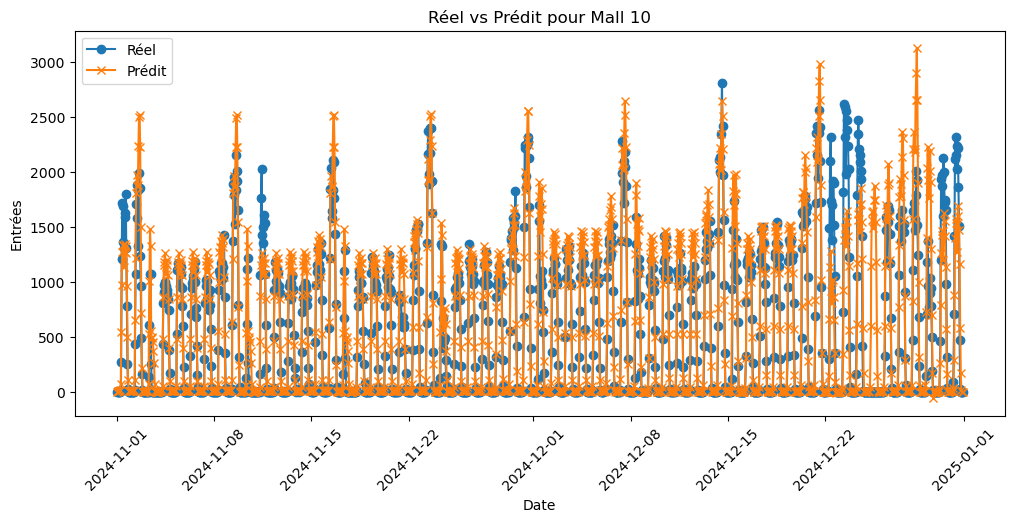

In [47]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.lightgbm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
from lightgbm import LGBMRegressor

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    if 'datetime' in df.columns:
        # Ici, on enl√®ve la timezone pour rester tz-na√Øf
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On part du DataFrame d√©j√† charg√© "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (avec votre cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration MLForecast avec LightGBM
# -----------------------------------------------------------------
models = [
    LGBMRegressor(
        objective='regression',
        boosting_type='gbdt',
        verbosity=-1,
        random_state=42
    )
]

# Utilisation de MLForecast avec fr√©quence horaire ('h')
fcst = MLForecast(
    models=models,
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement sur le jeu train
fcst.fit(train_df)

# La pr√©vision est faite pour un horizon par s√©rie.
# Ici, MLForecast pr√©voit pour chaque s√©rie h p√©riodes,
# o√π h = (nombre de lignes de test) / (nombre de s√©ries).
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "LGBMRegressor"  # d'apr√®s votre sortie

# -----------------------------------------------------------------
# 4) Aligner les timestamps pour la fusion
# -----------------------------------------------------------------
# Pour garantir une fusion exacte, on "arrondit" les timestamps √† l'heure.
train_df['ds_aligned'] = train_df['ds'].dt.floor('h')
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

# Fusionner test_df et forecast sur unique_id et ds_aligned.
df_merge = pd.merge(test_df, forecast[['unique_id','ds_aligned', pred_col]],
                    left_on=['unique_id','ds_aligned'],
                    right_on=['unique_id','ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_pred = df_merge[pred_col].values
y_true = df_merge["y"].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")

# -----------------------------------------------------------------
# 5) Enregistrement avec MLflow
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "MLForecast_LightGBM")
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.lightgbm.log_model(models[0], "lightgbm_model")

# -----------------------------------------------------------------
# 6) Visualisation des pr√©dictions (pour une s√©rie, par exemple le premier unique_id)
# -----------------------------------------------------------------
unique_id_example = df_merge["unique_id"].unique()[0]
df_plot = df_merge[df_merge["unique_id"] == unique_id_example].sort_values("ds")

plt.figure(figsize=(12, 5))
plt.plot(df_plot["ds"], df_plot["y"], label="R√©el", marker="o")
plt.plot(df_plot["ds"], df_plot[pred_col], label="Pr√©dit", marker="x")
plt.xlabel("Date")
plt.ylabel("Entr√©es")
plt.title(f"R√©el vs Pr√©dit pour Mall {unique_id_example}")
plt.legend()
plt.xticks(rotation=45)
plt.show()


V√©rif si overfit

In [14]:
print(df[['y']].describe())


                   y
count  175440.000000
mean      435.749866
std       562.368079
min         0.000000
25%         0.000000
50%        46.000000
75%       837.000000
max      2092.500000


XGboost

nixtla xgboost

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'XGBRegressor']

=== M√©triques Globales ===
RMSE : 369.7224
MAE  : 194.8565

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  273.452514  133.267887
1        11  294.309827  151.254001
2        19  294.845829  143.435153
3        20  475.199537  285.866951
4        37  341.145491  178.040884
5        38  455.826535  240.985745
6        47  305.969438  162.524195
7         5  373.175440  207.837907
8        53  299.140354  153.865594
9        71  496.268791  291.486301


C:\Users\David\AppData\Local\Temp\ipykernel_17196\1021014286.py:105: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


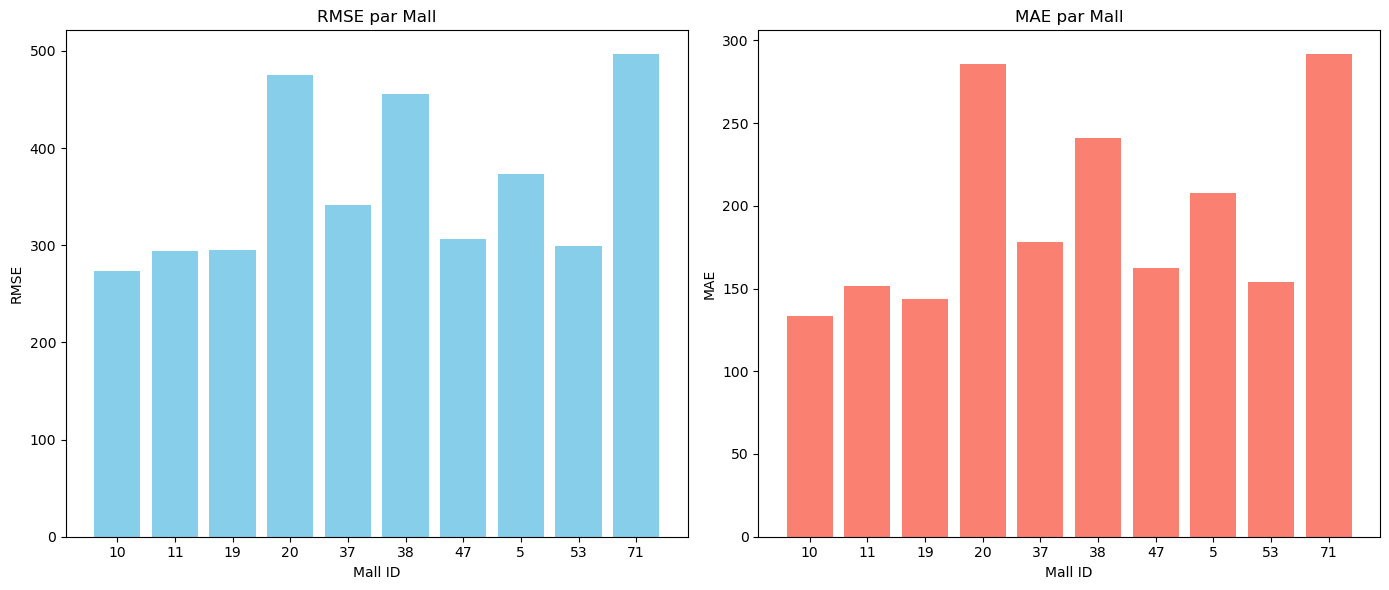

In [51]:
import pandas as pd
import numpy as np
import xgboost as xgb
import mlflow
import mlflow.xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Retirer la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# Supposons que votre DataFrame d'origine s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (en gardant le cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec XGBoost
# -----------------------------------------------------------------
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Cr√©ation du mod√®le XGBoost via XGBRegressor
model = xgb.XGBRegressor(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "XGBRegressor" if "XGBRegressor" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla xgboost")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


Nixtla Catboost

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
0:	learn: 544.2227138	total: 16.8ms	remaining: 8.4s
50:	learn: 134.6420137	total: 671ms	remaining: 5.91s
100:	learn: 110.6282530	total: 1.35s	remaining: 5.33s
150:	learn: 103.0556736	total: 1.97s	remaining: 4.54s
200:	learn: 98.4153092	total: 2.55s	remaining: 3.79s
250:	learn: 95.6086603	total: 3.13s	remaining: 3.11s
300:	learn: 93.4372162	total: 3.72s	remaining: 2.46s
350:	learn: 91.8315486	total: 4.27s	remaining: 1.81s
400:	learn: 90.6196072	total: 4.83s	remaining: 1.19s
450:	learn: 89.7637102	total: 5.41s	remaining: 587ms
499:	learn: 89.0575723	total: 5.95s	remaining: 0us
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'CatBoostRegressor']

=== M√©triques Globales ===
RMSE : 447.9397
MAE  : 238.1353

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  326.576648  168.748508
1        11  307.312764  151.340450
2        19  421.015005  209.685141
3        20 

C:\Users\David\AppData\Local\Temp\ipykernel_17196\2325384045.py:107: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


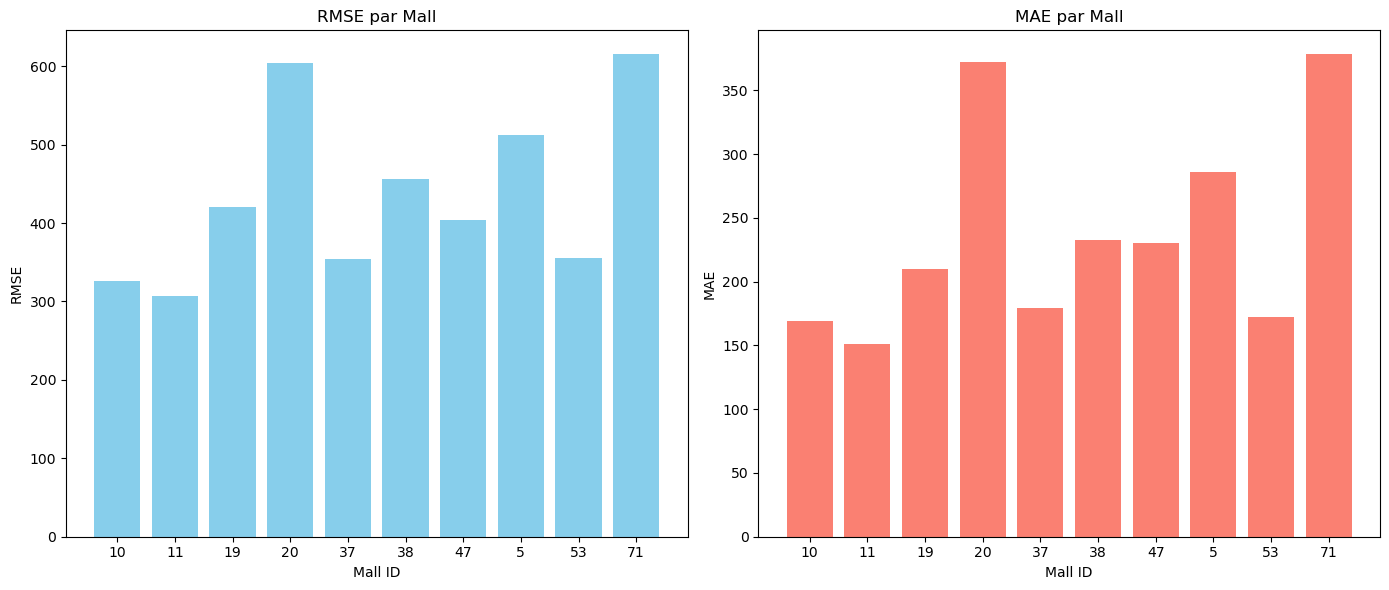

In [50]:
import pandas as pd
import numpy as np
import catboost as cb
import mlflow
import mlflow.catboost
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Suppression de la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On suppose que le DataFrame initial s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec CatBoost
# -----------------------------------------------------------------
params = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'iterations': 500,
    'learning_rate': 0.05,
    'depth': 6,
    'random_seed': 42,
    'verbose': 50
}

# Cr√©ation du mod√®le CatBoost
model = cb.CatBoostRegressor(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "CatBoostRegressor" if "CatBoostRegressor" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla catboost")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


Nixtla random forest

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'RandomForestRegressor']

=== M√©triques Globales ===
RMSE : 366.8602
MAE  : 190.0653

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  337.111977  187.373293
1        11  419.921642  236.470202
2        19  287.735609  142.992411
3        20  253.106953  153.135743
4        37  472.615749  261.801317
5        38  638.852597  348.237389
6        47  276.053748  129.632242
7         5  223.096712  115.691592
8        53  303.304055  178.473974
9        71  244.050670  146.845197


C:\Users\David\AppData\Local\Temp\ipykernel_17196\1132224548.py:104: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


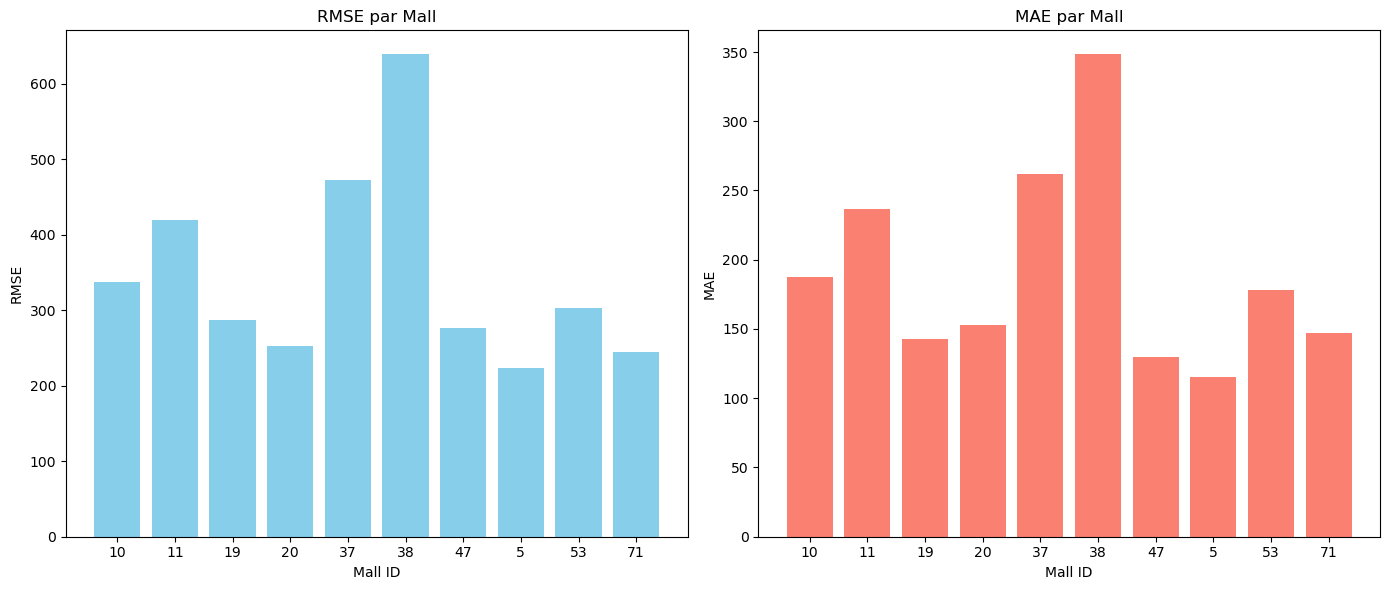

In [52]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Suppression de la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On suppose que le DataFrame initial s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec Random Forest
# -----------------------------------------------------------------
params = {
    'n_estimators': 200,
    'max_depth': 10,
    'random_state': 42,
    'n_jobs': -1
}

# Cr√©ation du mod√®le RandomForest
model = RandomForestRegressor(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "RandomForestRegressor" if "RandomForestRegressor" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla random forest")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


Nixtla extra trees, extantion de random forest

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'ExtraTreesRegressor']

=== M√©triques Globales ===
RMSE : 439.1970
MAE  : 285.9633

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  345.429268  230.471486
1        11  359.193004  226.747498
2        19  406.328357  264.450001
3        20  525.601085  375.090533
4        37  442.425623  287.159761
5        38  565.247077  343.373979
6        47  411.032617  275.160508
7         5  453.072424  301.555391
8        53  289.082869  178.319423
9        71  515.949667  377.304174


C:\Users\David\AppData\Local\Temp\ipykernel_17196\2201237593.py:104: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


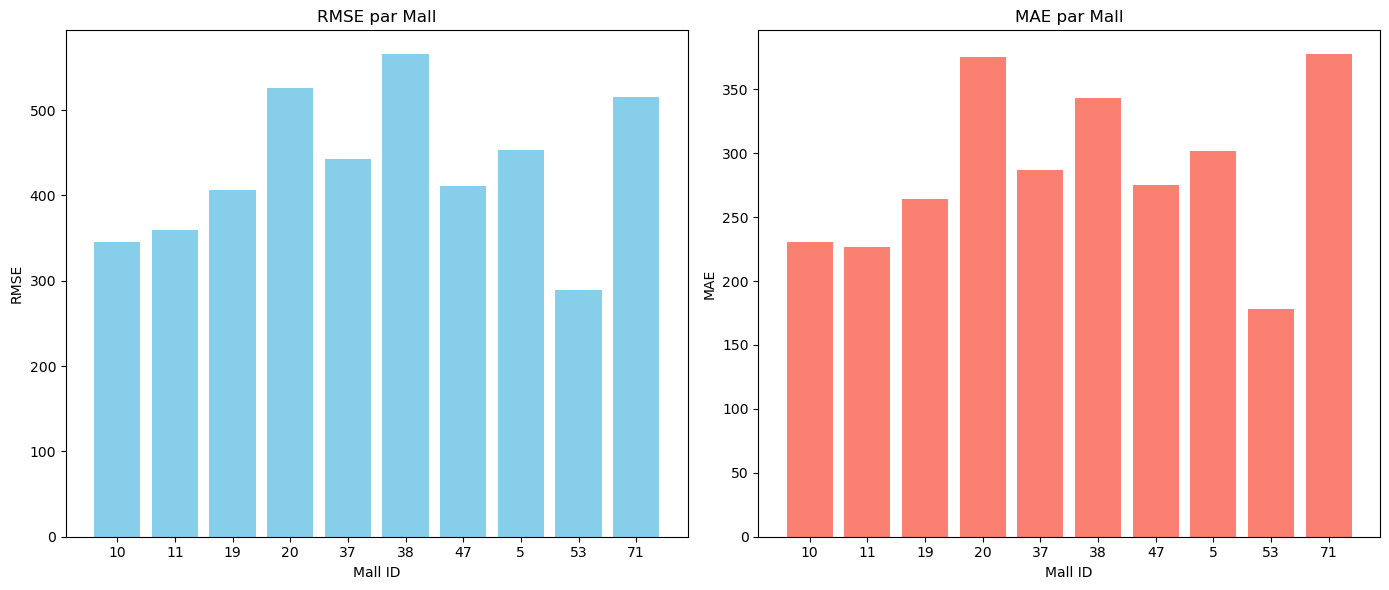

In [53]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Suppression de la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On suppose que le DataFrame initial s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec Extra Trees
# -----------------------------------------------------------------
params = {
    'n_estimators': 200,
    'max_depth': 10,
    'random_state': 42,
    'n_jobs': -1
}

# Cr√©ation du mod√®le Extra Trees
model = ExtraTreesRegressor(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "ExtraTreesRegressor" if "ExtraTreesRegressor" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla extra trees")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


Nixtla ridge regression

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'Ridge']

=== M√©triques Globales ===
RMSE : 587.9197
MAE  : 445.7629

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  588.076233  467.118102
1        11  668.232681  515.602382
2        19  551.505116  440.356944
3        20  372.901850  314.528624
4        37  729.544400  545.987055
5        38  897.611423  652.450774
6        47  530.395592  411.621172
7         5  438.904985  364.286710
8        53  540.065994  452.390624
9        71  342.555219  293.287077


C:\Users\David\AppData\Local\Temp\ipykernel_17196\353588375.py:102: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


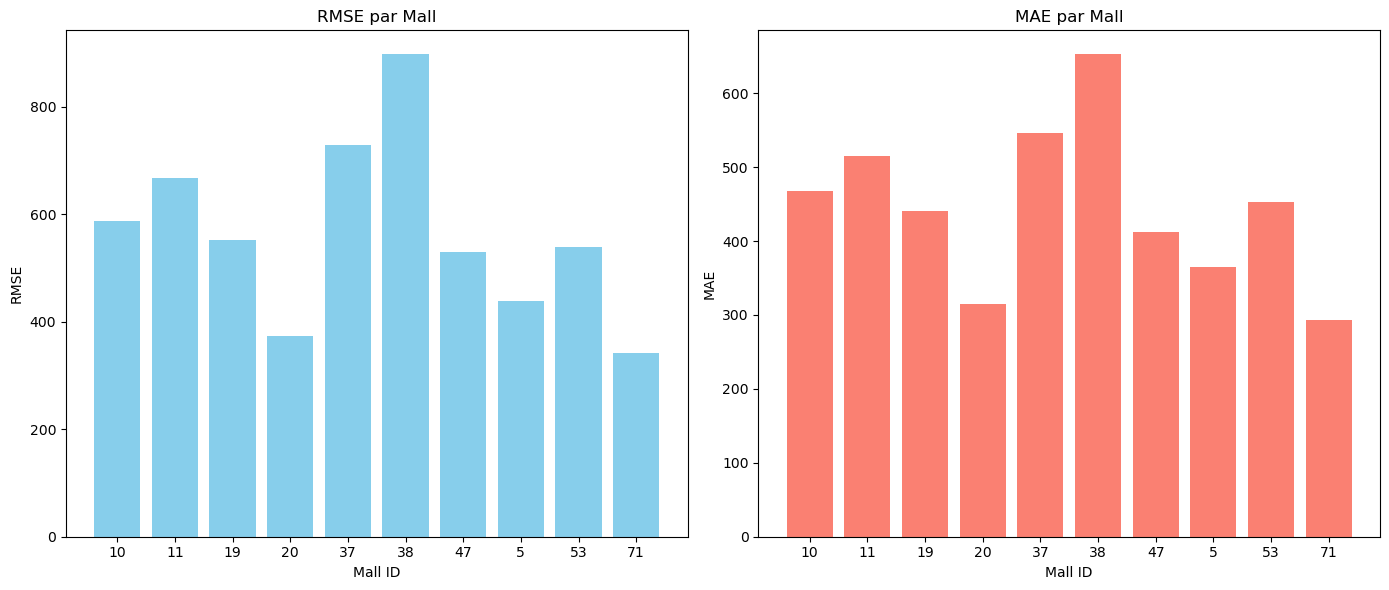

In [54]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Suppression de la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On suppose que le DataFrame initial s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec Ridge Regression
# -----------------------------------------------------------------
params = {
    'alpha': 1.0,  # Param√®tre de r√©gularisation L2
    'random_state': 42
}

# Cr√©ation du mod√®le Ridge Regression
model = Ridge(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "Ridge" if "Ridge" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla ridge regression")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


Nixtla gradient boosting

Nombre de lignes en train : 160810
Nombre de lignes en test  : 14630
Horizon par s√©rie : 1463
Colonnes du forecast : ['unique_id', 'ds', 'GradientBoostingRegressor']

=== M√©triques Globales ===
RMSE : 361.8819
MAE  : 196.5020

=== M√©triques par Centre Commercial ===
  unique_id        rmse         mae
0        10  269.500959  139.558143
1        11  277.074608  132.860718
2        19  267.564553  146.554697
3        20  485.042444  307.522042
4        37  324.181198  161.826172
5        38  432.202448  220.109719
6        47  314.964559  186.315641
7         5  367.684709  222.023129
8        53  272.207559  135.190114
9        71  502.933998  313.059572


C:\Users\David\AppData\Local\Temp\ipykernel_17196\1322826274.py:105: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


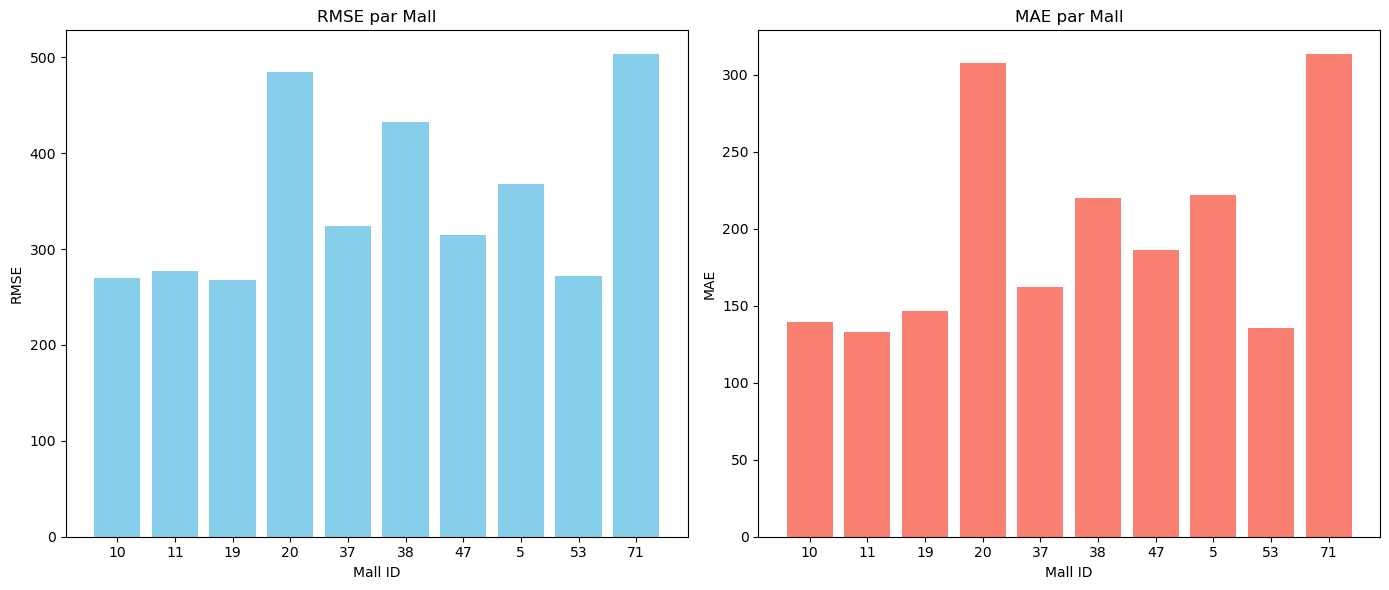

In [55]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast

# -----------------------------------------------------------------
# 1) Pr√©paration des donn√©es
# -----------------------------------------------------------------
def prepare_data(df):
    if 'Mall ID' in df.columns:
        df['unique_id'] = df['Mall ID'].astype(str)
    else:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)  # Suppression de la timezone
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' in df.columns:
        df['y'] = df['Entr√©es']
    else:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    
    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# On suppose que le DataFrame initial s'appelle "df"
df_prepared = prepare_data(df)

# -----------------------------------------------------------------
# 2) Split Train/Test (cutoff d'origine)
# -----------------------------------------------------------------
cutoff = pd.to_datetime('2024-10-31 23:59:59')  # cutoff d'origine
train_df = df_prepared[df_prepared['ds'] <= cutoff].copy()
test_df  = df_prepared[df_prepared['ds'] > cutoff].copy()

print("Nombre de lignes en train :", len(train_df))
print("Nombre de lignes en test  :", len(test_df))

# -----------------------------------------------------------------
# 3) Configuration de MLForecast avec Gradient Boosting
# -----------------------------------------------------------------
params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'random_state': 42
}

# Cr√©ation du mod√®le Gradient Boosting
model = GradientBoostingRegressor(**params)

# Configuration de MLForecast :
fcst = MLForecast(
    models=[model],
    freq='h',
    lags=[1],
    date_features=['hour', 'day', 'dayofweek', 'month']
)

# Entra√Ænement
fcst.fit(train_df)

# D√©termination de l'horizon par s√©rie
n_series = train_df['unique_id'].nunique()
horizon = len(test_df) // n_series
print("Horizon par s√©rie :", horizon)

# Pr√©dictions
forecast = fcst.predict(h=horizon)
print("Colonnes du forecast :", forecast.columns.tolist())
pred_col = "GradientBoostingRegressor" if "GradientBoostingRegressor" in forecast.columns else "yhat"

# -----------------------------------------------------------------
# 4) Fusion et calcul des m√©triques (RMSE et MAE) par centre commercial
# -----------------------------------------------------------------
test_df['ds_aligned'] = test_df['ds'].dt.floor('h')
forecast['ds_aligned'] = forecast['ds'].dt.floor('h')

df_merge = pd.merge(test_df, forecast[['unique_id', 'ds_aligned', pred_col]],
                    on=['unique_id', 'ds_aligned'],
                    how='left')

if df_merge[pred_col].isna().any():
    raise ValueError("Des valeurs manquent dans la fusion entre test_df et forecast.")

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae  = mean_absolute_error(y_true, y_pred)

print("\n=== M√©triques Globales ===")
print(f"RMSE : {global_rmse:.4f}")
print(f"MAE  : {global_mae:.4f}")

# Calcul des m√©triques par centre commercial (mall)
metrics_per_mall = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': mean_absolute_error(g['y'], g[pred_col])
    })
).reset_index()

print("\n=== M√©triques par Centre Commercial ===")
print(metrics_per_mall)

# -----------------------------------------------------------------
# 5) Visualisation des m√©triques par centre commercial
# -----------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(metrics_per_mall['unique_id'], metrics_per_mall['rmse'], color='skyblue')
axes[0].set_title("RMSE par Mall")
axes[0].set_xlabel("Mall ID")
axes[0].set_ylabel("RMSE")

axes[1].bar(metrics_per_mall['unique_id'], metrics_per_mall['mae'], color='salmon')
axes[1].set_title("MAE par Mall")
axes[1].set_xlabel("Mall ID")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 6) Enregistrement des m√©triques avec MLflow (avec le bon nom de run)
# -----------------------------------------------------------------
mlflow.set_experiment("Carmila")
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "nixtla gradient boosting")
    mlflow.log_params(params)
    mlflow.log_metric("RMSE", global_rmse)
    mlflow.log_metric("MAE", global_mae)


machine learning final, randomforest avec les features

In [25]:
print("Train columns:", train_df.columns)
print("Test columns:", test_df.columns)


Train columns: Index(['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98',
       'Super√©thanol E85', 'day', 'dayofweek', 'fermeture_exceptionnelle',
       'hour', 'is_open', 'lag1', 'month', 'ouverture_exceptionnelle',
       'rolling_mean_24', 'sun_up', 'weather'],
      dtype='object')
Test columns: Index(['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98',
       'Super√©thanol E85', 'day', 'dayofweek', 'fermeture_exceptionnelle',
       'hour', 'is_open', 'lag1', 'month', 'ouverture_exceptionnelle',
       'rolling_mean_24', 'sun_up', 'weather'],
      dtype='object')


In [2]:
def prepare_data(df):
    # Check which column exists for timestamps
    datetime_col = None
    for col in ['datetime', 'date', 'ds']:  # Possible column names
        if col in df.columns:
            datetime_col = col
            break

    if datetime_col is None:
        raise KeyError("No valid timestamp column found in the dataset. Expected one of: 'datetime', 'date', 'ds'.")

    df['unique_id'] = df['Mall ID'].astype(str)
    df['ds'] = pd.to_datetime(df[datetime_col]).dt.tz_localize(None)  # Ensure no timezone issues
    df['y'] = df['Entr√©es']

    return df[['unique_id', 'ds', 'y']].sort_values(['unique_id', 'ds']).reset_index(drop=True)

# Check before running
print("Columns in dataset:", df.columns)

# Prepare the data
df_prepared = prepare_data(df)


Columns in dataset: Index(['date', 'Entr√©es', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle', 'Gazole', 'Sans plomb 98', 'SP 95 E10',
       'Super√©thanol E85', 'weather'],
      dtype='object')


In [16]:
df.columns

Index(['date', 'Entr√©es', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle', 'Gazole', 'Sans plomb 98', 'SP 95 E10',
       'Super√©thanol E85', 'weather', 'unique_id', 'y'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
from mlforecast.feature_engineering import transform_exog
from mlforecast.lag_transforms import ExpandingMean

# Load your data
df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv", low_memory=False)

# -------------------------------
# 1) Data Preparation
# -------------------------------
def prepare_data(df):
    tqdm.write("üìå Preparing dataset...")
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']
    
    # Retain exogenous features
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]
    
    return df[['unique_id', 'ds', 'y'] + exog_columns].sort_values(['unique_id', 'ds']).reset_index(drop=True)

df_prepared = prepare_data(df)

# -------------------------------
# 2) Exogenous Feature Transformation
# -------------------------------
def create_exog_features(df):
    tqdm.write("üîÑ Transforming exogenous features...")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]
    if not exog_columns:
        tqdm.write("‚ö†Ô∏è No exogenous columns found!")
        return df
    tqdm.write(f"‚úÖ Found exogenous features: {exog_columns}")
    
    exog_df = df[['unique_id', 'ds'] + exog_columns].copy()
    for col in tqdm(exog_columns, desc="Processing exogenous features"):
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)
    
    transformed_exog = transform_exog(
        exog_df,
        lags=[1],
        lag_transforms={1: [ExpandingMean()]}
    )
    tqdm.write("üìä Transformed exog columns: " + str(transformed_exog.columns.tolist()))
    
    # Merge transformed exogenous features back
    df_merged = df.merge(transformed_exog, on=['unique_id', 'ds'], how='left')
    for col in exog_columns:
        if f"{col}_y" in df_merged.columns:
            df_merged[col] = df_merged[f"{col}_y"]
        df_merged.drop(columns=[c for c in [f"{col}_x", f"{col}_y"] if c in df_merged.columns], inplace=True)
    
    tqdm.write("‚úÖ Final Columns after transformation: " + str(df_merged.columns.tolist()))
    return df_merged

df_features = create_exog_features(df_prepared)

# -------------------------------
# 3) Train/Test Split
# -------------------------------
# Use the last 7 days for testing
cutoff = df_features['ds'].max() - pd.Timedelta(days=7)
train_df = df_features[df_features['ds'] < cutoff].copy()
test_df = df_features[df_features['ds'] >= cutoff].copy()

tqdm.write(f"‚úÖ Train size: {len(train_df)}, Test size: {len(test_df)}")
assert set(train_df['unique_id']) == set(test_df['unique_id']), "Train and test do not cover the same series!"

# Forecast horizon
horizon = len(test_df['ds'].unique())
tqdm.write("Horizon par s√©rie: " + str(horizon))

# -------------------------------
# 4) MLForecast Configuration & Training
# -------------------------------
params = {
    'n_estimators': 200,
    'max_depth': 10,
    'random_state': 42,
    'n_jobs': -1
}
# Define exogenous features: all columns except 'unique_id', 'ds', and 'y'
exog_features = [col for col in df_features.columns if col not in ['unique_id', 'ds', 'y']]
# Remove columns that conflict with date_features (which will be generated automatically)
exog_features = [col for col in exog_features if col not in ['day_of_week', 'month', 'hour']]
tqdm.write("‚úÖ Final Exogenous Features to Use: " + str(exog_features))
# Save the training exogenous feature order.
training_exog_order = exog_features.copy()

fcst = MLForecast(
    models=[RandomForestRegressor(**params)],
    freq='D',  # Adjust based on your data frequency
    lags=[1],
    date_features=['hour', 'day_of_week', 'month'],
    num_threads=-1
)

with tqdm(total=1, desc="üöÄ Training model") as pbar:
    fcst.fit(train_df, static_features=[])
    pbar.update(1)

# -------------------------------
# 5) Prepare X_df for Prediction & Pre-Prediction Checks
# -------------------------------
# Generate the future DataFrame with the correct structure
X_future = fcst.make_future_dataframe(h=horizon)

# Merge exogenous features into the future DataFrame
X_future = X_future.merge(
    test_df[['unique_id', 'ds'] + training_exog_order],
    on=['unique_id', 'ds'],
    how='left'
)

# Fill missing values in exogenous features
X_future[training_exog_order] = X_future[training_exog_order].ffill().bfill()

# Reorder columns to match the training order exactly
X_future = X_future[['unique_id', 'ds'] + training_exog_order]

# Verify that every unique_id appears exactly once.
group_counts = X_future.groupby('unique_id').size()
assert group_counts.nunique() == 1, f"‚ùå X_future does not have exactly one row per unique_id. Counts:\n{group_counts}"

expected_columns = ['unique_id', 'ds'] + training_exog_order
assert list(X_future.columns) == expected_columns, "‚ùå X_future columns do not match expected order!"

tqdm.write("‚úÖ X_future is correctly structured and complete.")

# -------------------------------
# 6) Prediction
# -------------------------------
with tqdm(total=1, desc="üìà Making predictions") as pbar:
    forecast = fcst.predict(h=horizon, X_df=X_future)
    pbar.update(1)

# -------------------------------
# 7) Merge Predictions & Compute Metrics
# -------------------------------

# Create date columns from the timestamp objects to ensure exact matching.
train_df['ds_date'] = train_df['ds'].dt.date
test_df['ds_date'] = test_df['ds'].dt.date
forecast['ds_date'] = forecast['ds'].dt.date

# Identify the prediction column (first column aside from 'unique_id', 'ds', and 'ds_date')
pred_col = forecast.columns.drop(['unique_id', 'ds', 'ds_date'])[0]

df_merge = pd.merge(
    test_df,
    forecast[['unique_id', 'ds_date', pred_col]],
    on=['unique_id', 'ds_date'],
    how='left'
)

# Instead of raising an error, fill missing forecast predictions with 0.
df_merge[pred_col] = df_merge[pred_col].fillna(0)

y_true = df_merge["y"].values
y_pred = df_merge[pred_col].values

global_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
global_mae = mean_absolute_error(y_true, y_pred)

tqdm.write("\n=== üìä Global Metrics ===")
tqdm.write(f"RMSE: {global_rmse:.4f}")
tqdm.write(f"MAE:  {global_mae:.4f}")

metrics_per_series = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': np.mean(np.abs(g['y'] - g[pred_col]))
    })
).reset_index()

tqdm.write("\n=== üìä Metrics per Centre Commercial ===")
tqdm.write(str(metrics_per_series))
# -------------------------------
# 8) Log Results with MLflow
# -------------------------------
try:
    mlflow.set_experiment("Carmila")
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", "nixtla random forest with exog")
        mlflow.log_params(params)
        mlflow.log_metric("RMSE", global_rmse)
        mlflow.log_metric("MAE", global_mae)
        for _, row in metrics_per_series.iterrows():
            mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
            mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
except Exception as e:
    tqdm.write(f"‚ö†Ô∏è MLflow logging failed: {e}")

üìå Preparing dataset...
üîÑ Transforming exogenous features...
‚úÖ Found exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']


Processing exogenous features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:00<00:00, 82.24it/s]


üìä Transformed exog columns: ['unique_id', 'ds', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_lag1', 'Gazole_expanding_mean_lag1', 'SP 95 E10_lag1', 'SP 95 E10_expanding_mean_lag1', 'Sans plomb 98_lag1', 'Sans plomb 98_expanding_mean_lag1', 'Super√©thanol E85_lag1', 'Super√©thanol E85_expanding_mean_lag1', 'fermeture_exceptionnelle_lag1', 'fermeture_exceptionnelle_expanding_mean_lag1', 'is_open_lag1', 'is_open_expanding_mean_lag1', 'ouverture_exceptionnelle_lag1', 'ouverture_exceptionnelle_expanding_mean_lag1', 'sun_up_lag1', 'sun_up_expanding_mean_lag1', 'weather_lag1', 'weather_expanding_mean_lag1', 'day_of_week_lag1', 'day_of_week_expanding_mean_lag1', 'month_lag1', 'month_expanding_mean_lag1']


c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWarning: Setting num_threads to 1.
  warnings.warn("Setting num_threads to 1.")


‚úÖ Final Columns after transformation: ['unique_id', 'ds', 'y', 'Gazole_lag1', 'Gazole_expanding_mean_lag1', 'SP 95 E10_lag1', 'SP 95 E10_expanding_mean_lag1', 'Sans plomb 98_lag1', 'Sans plomb 98_expanding_mean_lag1', 'Super√©thanol E85_lag1', 'Super√©thanol E85_expanding_mean_lag1', 'fermeture_exceptionnelle_lag1', 'fermeture_exceptionnelle_expanding_mean_lag1', 'is_open_lag1', 'is_open_expanding_mean_lag1', 'ouverture_exceptionnelle_lag1', 'ouverture_exceptionnelle_expanding_mean_lag1', 'sun_up_lag1', 'sun_up_expanding_mean_lag1', 'weather_lag1', 'weather_expanding_mean_lag1', 'day_of_week_lag1', 'day_of_week_expanding_mean_lag1', 'month_lag1', 'month_expanding_mean_lag1', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Train size: 173790, Test size: 1690
Horizon par s√©rie: 232
‚úÖ Final Exogenous Features to Use: ['Gazole_lag1', 'Gazole_expanding_mean_l

üöÄ Training model: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:42<00:00, 42.03s/it]


‚úÖ X_future is correctly structured and complete.


üìà Making predictions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:06<00:00,  6.27s/it]
C:\Users\David\AppData\Local\Temp\ipykernel_19260\2740741632.py:198: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_series = df_merge.groupby('unique_id').apply(



=== üìä Global Metrics ===
RMSE: 899.9335
MAE:  503.0732

=== üìä Metrics per Centre Commercial ===
  unique_id         rmse         mae
0        10   943.365584  576.079391
1        11  1027.771653  625.735595
2        19   893.122379  494.590019
3        20   506.466494  283.562596
4        37  1105.456427  661.899605
5        38  1290.633901  705.969250
6        47   851.064439  486.670758
7         5   654.522224  359.229363
8        53   917.867546  565.313896
9        71   464.125736  271.681933


In [37]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
from mlforecast.feature_engineering import transform_exog
from mlforecast.lag_transforms import ExpandingMean
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1) Data Preparation
# -------------------------------
def prepare_data(df):
    tqdm.write("üìå Preparing dataset...")
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']
    
    # Retain exogenous features
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]
    return df[['unique_id', 'ds', 'y'] + exog_columns].sort_values(['unique_id', 'ds']).reset_index(drop=True)

df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv", low_memory=False)
df_prepared = prepare_data(df)

# -------------------------------
# 2) Exogenous Feature Transformation
# -------------------------------
def create_exog_features(df):
    tqdm.write("üîÑ Transforming exogenous features...")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]
    if not exog_columns:
        tqdm.write("‚ö†Ô∏è No exogenous columns found!")
        return df
    tqdm.write(f"‚úÖ Found exogenous features: {exog_columns}")
    
    # Convert exogenous features to numeric
    exog_df = df[['unique_id', 'ds'] + exog_columns].copy()
    for col in tqdm(exog_columns, desc="Processing exogenous features"):
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)
    
    # Use only a simple one-lag feature
    transformed_exog = transform_exog(
        exog_df,
        lags=[1]
    )
    tqdm.write("üìä Transformed exog columns: " + str(transformed_exog.columns.tolist()))
    
    # Merge transformed exogenous features back
    df_merged = df.merge(transformed_exog, on=['unique_id', 'ds'], how='left')
    for col in exog_columns:
        if f"{col}_y" in df_merged.columns:
            df_merged[col] = df_merged[f"{col}_y"]
        df_merged.drop(columns=[c for c in [f"{col}_x", f"{col}_y"] if c in df_merged.columns], inplace=True)
    
    tqdm.write("‚úÖ Final Columns after transformation: " + str(df_merged.columns.tolist()))
    return df_merged

df_features = create_exog_features(df_prepared)

# (Optional) Filter series with too few observations
min_obs = 10
df_features = df_features.groupby("unique_id").filter(lambda x: x["ds"].nunique() >= min_obs)

# -------------------------------
# 3) Train/Test Split (80/20 split by hour)
# -------------------------------
# Create a column with floored hourly timestamps (using lowercase 'h' per pandas 1.5+ recommendation)
df_features['ds_hour'] = df_features['ds'].dt.floor('h')
unique_hours = sorted(df_features['ds_hour'].unique())
split_index = int(0.8 * len(unique_hours))
train_hours = set(unique_hours[:split_index])
test_hours = set(unique_hours[split_index:])

train_df = df_features[df_features['ds_hour'].isin(train_hours)].copy()
test_df = df_features[df_features['ds_hour'].isin(test_hours)].copy()

# Drop 'ds_hour' from train and test before training
train_df = train_df.drop(columns=['ds_hour'])
test_df = test_df.drop(columns=['ds_hour'])

tqdm.write(f"‚úÖ Train size (hourly): {len(train_df)}, Test size (hourly): {len(test_df)}")

# Forecast horizon: number of unique test hours (using test_df ds floored to hour)
test_hours_unique = sorted(test_df['ds'].dt.floor('h').unique())
horizon = len(test_hours_unique)
tqdm.write("Horizon (number of test hours): " + str(horizon))

# -------------------------------
# 4) MLForecast Configuration & Training (Hourly)
# -------------------------------
params = {
    'n_estimators': 200,
    'max_depth': 10,
    'random_state': 42,
    'n_jobs': -1
}
# Define exogenous features: all columns not in ['unique_id', 'ds', 'y']
exog_features = [col for col in df_features.columns if col not in ['unique_id', 'ds', 'y', 'ds_hour']]
# Remove any unwanted date-related columns if present (keep lag features as they are numeric)
exog_features = [col for col in exog_features if col not in ['day_of_week', 'month', 'hour']]
tqdm.write("‚úÖ Final Exogenous Features to Use: " + str(exog_features))
training_exog_order = exog_features.copy()

fcst = MLForecast(
    models=[RandomForestRegressor(**params)],
    freq='h',  # Hourly frequency
    lags=[1],
    date_features=['hour', 'day_of_week', 'month'],
    num_threads=-1
)

with tqdm(total=1, desc="üöÄ Training model") as pbar:
    fcst.fit(train_df, static_features=[])
    pbar.update(1)

# -------------------------------
# 5) Prepare X_future for Prediction (Hourly)
# -------------------------------
X_future = fcst.make_future_dataframe(h=horizon)
# Merge exogenous features into X_future from test_df
X_future = X_future.merge(
    test_df[['unique_id', 'ds'] + training_exog_order],
    on=['unique_id', 'ds'],
    how='left'
)
X_future[training_exog_order] = X_future[training_exog_order].ffill().bfill()
X_future = X_future[['unique_id', 'ds'] + training_exog_order]
group_counts = X_future.groupby('unique_id').size()
assert group_counts.nunique() == 1, f"‚ùå X_future does not have exactly one row per unique_id. Counts:\n{group_counts}"
expected_columns = ['unique_id', 'ds'] + training_exog_order
assert list(X_future.columns) == expected_columns, "‚ùå X_future columns do not match expected order!"
tqdm.write("‚úÖ X_future is correctly structured and complete.")

# -------------------------------
# 6) Prediction (Hourly)
# -------------------------------
with tqdm(total=1, desc="üìà Making predictions") as pbar:
    forecast = fcst.predict(h=horizon, X_df=X_future)
    pbar.update(1)

# -------------------------------
# 7) Merge Predictions & Compute Metrics with Aggregation (Test, Hourly)
# -------------------------------
# Create a column with hourly timestamps as keys
train_df['ds_hour'] = train_df['ds'].dt.floor('h')
test_df['ds_hour'] = test_df['ds'].dt.floor('h')
forecast['ds_hour'] = forecast['ds'].dt.floor('h')

# Aggregate test data by unique_id and ds_hour (taking the mean of y)
test_agg = test_df.groupby(['unique_id', 'ds_hour'], as_index=False).agg({'y': 'mean'})

# Identify the prediction column (first column aside from 'unique_id', 'ds', 'ds_hour')
pred_col = forecast.columns.drop(['unique_id', 'ds', 'ds_hour'])[0]

# Use an inner join so that only matching merge keys are kept
df_merge = pd.merge(
    test_agg,
    forecast[['unique_id', 'ds_hour', pred_col]],
    on=['unique_id', 'ds_hour'],
    how='inner'
)

# Check if merging dropped some test entries.
if len(df_merge) < len(test_agg):
    missing_count = len(test_agg) - len(df_merge)
    tqdm.write(f"‚ö†Ô∏è Warning: {missing_count} test entries did not have forecast predictions and will be dropped from evaluation.")

y_true_test = df_merge["y"].values
y_pred_test = df_merge[pred_col].values
global_rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
global_mae_test = mean_absolute_error(y_true_test, y_pred_test)
tqdm.write("\n=== üìä Test Metrics (Hourly) ===")
tqdm.write(f"Test RMSE: {global_rmse_test:.4f}")
tqdm.write(f"Test MAE:  {global_mae_test:.4f}")

metrics_per_series_test = df_merge.groupby('unique_id').apply(
    lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': np.mean(np.abs(g['y'] - g[pred_col]))
    })
).reset_index()
tqdm.write("\n=== üìä Test Metrics per Centre Commercial (Hourly) ===")
tqdm.write(str(metrics_per_series_test))


# -------------------------------
# 8) Log Results with MLflow
# -------------------------------
try:
    mlflow.set_experiment("Carmila")
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", "nixtla random forest with exog (Hourly)")
        mlflow.log_params(params)
        mlflow.log_metric("RMSE", global_rmse_test)
        mlflow.log_metric("MAE", global_mae_test)
        for _, row in metrics_per_series_test.iterrows():
            mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
            mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
except Exception as e:
    tqdm.write(f"‚ö†Ô∏è MLflow logging failed: {e}")

üìå Preparing dataset...
üîÑ Transforming exogenous features...
‚úÖ Found exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']


Processing exogenous features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:00<00:00, 102.58it/s]


üìä Transformed exog columns: ['unique_id', 'ds', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWarning: Setting num_threads to 1.
  warnings.warn("Setting num_threads to 1.")


‚úÖ Final Columns after transformation: ['unique_id', 'ds', 'y', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Train size (hourly): 140390, Test size (hourly): 35090
Horizon (number of test hours): 3509
‚úÖ Final Exogenous Features to Use: ['Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather']


üöÄ Training model: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:10<00:00, 10.62s/it]


‚úÖ X_future is correctly structured and complete.


üìà Making predictions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [01:10<00:00, 70.26s/it]
C:\Users\David\AppData\Local\Temp\ipykernel_19260\2032611321.py:203: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_series_test = df_merge.groupby('unique_id').apply(


‚ö†Ô∏è Warning: 10 test entries did not have forecast predictions and will be dropped from evaluation.

=== üìä Test Metrics (Hourly) ===
Test RMSE: 253.9702
Test MAE:  118.3164

=== üìä Test Metrics per Centre Commercial (Hourly) ===
  unique_id        rmse         mae
0        10  213.373433  110.312702
1        11  255.727212  131.669886
2        19  262.754162  126.415692
3        20  129.443147   61.535095
4        37  318.535506  153.710710
5        38  415.175694  205.277634
6        47  299.596587  147.045520
7         5  206.443552  108.058890
8        53  181.241862   91.339274
9        71   96.058732   47.798429


1) Overall Test Metrics (Hourly)
Test RMSE (Root Mean Squared Error) = 253.97

RMSE measures the average prediction error in the same unit as the target variable (Entr√©es).
A higher RMSE indicates more significant deviations between predicted and actual values.
A value of 253.97 means that, on average, the predicted number of entries deviates by approximately 254 from the actual value.
Test MAE (Mean Absolute Error) = 118.32

MAE measures the absolute difference between actual and predicted values.
Unlike RMSE, MAE is not sensitive to large errors (since it doesn‚Äôt square the differences).
A value of 118.32 means that, on average, predictions are off by around 118 entries per hour.
Lower MAE suggests better accuracy.

In [42]:
import plotly.graph_objects as go

# Create interactive figure using WebGL-based scatter (Scattergl)
fig = go.Figure()

# Add actual values using Scattergl for better performance
fig.add_trace(go.Scattergl(
    x=test_mall['ds'],
    y=test_mall['y'],
    mode='lines+markers',
    name='R√©el',
    marker=dict(symbol='circle', size=8),
    connectgaps=True,
    hovertemplate="Date: %{x}<br>R√©el: %{y}<extra></extra>"
))

# Add predicted values using Scattergl
fig.add_trace(go.Scattergl(
    x=test_mall['ds'],
    y=test_mall['y_pred'],
    mode='lines+markers',
    name='Pr√©dit',
    marker=dict(symbol='x', size=10),
    connectgaps=True,
    hovertemplate="Date: %{x}<br>Pr√©dit: %{y}<extra></extra>"
))

# Update the layout with unified hover mode and a range slider for interactivity
fig.update_layout(
    title=f"Comparaison R√©el vs Pr√©dit pour Mall {mall_id}",
    xaxis_title="Date",
    yaxis_title="Nombre d'entr√©es",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    hovermode="x unified",
    template="plotly_white"
)

# Display the interactive plot
fig.show()

Meilleure r√©sultat avec des valeurs exog√®nes mais pas utilisable pour pr√©dire dans le futur parce que valeurs pas dispo et qui changent, on montre juste que √ßa peut-etre bien pour un modele court

Test avec plus de feature : 
Lags multiples de y : y_lag_2, y_lag_3, y_lag_4, etc.
Statistiques mobiles : moyenne et √©cart-type sur diff√©rentes fen√™tres.
Diff√©rences temporelles : y_diff et y_pct_change.
Indicateurs techniques du monde du trading : RSI, MACD, Bollinger Bands, Momentum.

üöÄ Applying transformations on TRAIN
üîÑ Transforming exogenous features (no leakage).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
üìä Transformed exog columns: ['unique_id', 'ds', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']
‚úÖ Final columns after exog transform: ['unique_id', 'ds', 'y', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', '

C:\Users\David\AppData\Local\Temp\ipykernel_13168\3625722393.py:170: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
C:\Users\David\AppData\Local\Temp\ipykernel_13168\3625722393.py:187: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWar

üöÄ Applying transformations on TEST
üîÑ Transforming exogenous features (no leakage).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
üìä Transformed exog columns: ['unique_id', 'ds', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']
‚úÖ Final columns after exog transform: ['unique_id', 'ds', 'y', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'd

C:\Users\David\AppData\Local\Temp\ipykernel_13168\3625722393.py:249: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


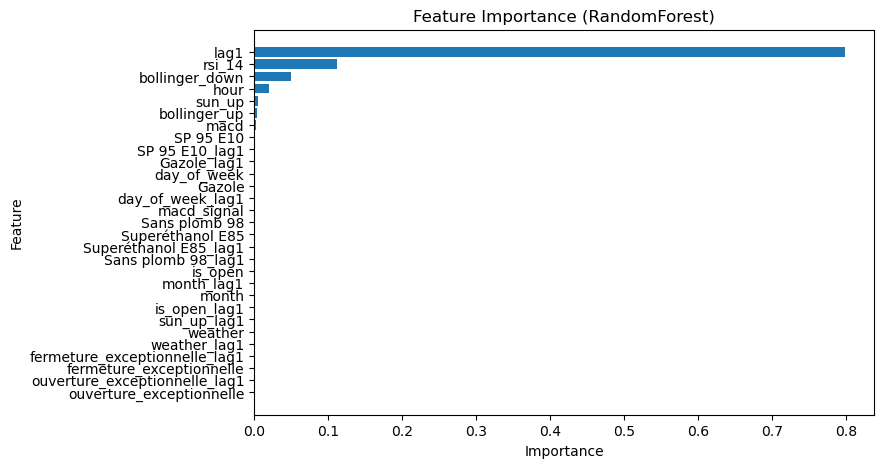

In [46]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
from mlforecast.feature_engineering import transform_exog
import matplotlib.pyplot as plt

###############################################################
# 1) prepare_data
###############################################################
def prepare_data(df):
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)

    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")

    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']

    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]

    return df[['unique_id','ds','y'] + exog_columns].sort_values(['unique_id','ds']).reset_index(drop=True)

###############################################################
# 2) Trading indicators
###############################################################
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta>0, 0).rolling(window).mean()
    loss = -delta.where(delta<0, 0).rolling(window).mean()
    rs = gain / loss
    return 100 - (100/(1 + rs))

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd_val = short_ema - long_ema
    macd_signal = macd_val.ewm(span=signal_window, adjust=False).mean()
    return macd_val, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + num_std*rolling_std
    lower_band = rolling_mean - num_std*rolling_std
    return upper_band, lower_band

def add_trading_indicators(df):
    # RSI(14)
    df['rsi_14'] = df.groupby('unique_id')['y'].transform(lambda s: compute_rsi(s, 14))

    # MACD => 2 colonnes
    def _macd_df(s):
        macd_vals, macd_sig = compute_macd(s)
        out = pd.DataFrame({'macd': macd_vals, 'macd_signal': macd_sig}, index=s.index)
        return out
    macd_data = df.groupby('unique_id')['y'].apply(_macd_df)
    macd_data.reset_index(level=0, drop=True, inplace=True)
    df[['macd','macd_signal']] = macd_data[['macd','macd_signal']]

    # Bollinger => 2 colonnes
    def _boll_df(s):
        up,down = compute_bollinger_bands(s)
        out = pd.DataFrame({'bollinger_up':up,'bollinger_down':down}, index=s.index)
        return out
    boll_data = df.groupby('unique_id')['y'].apply(_boll_df)
    boll_data.reset_index(level=0, drop=True, inplace=True)
    df[['bollinger_up','bollinger_down']] = boll_data[['bollinger_up','bollinger_down']]

    # Momentum(14) - removed as requested
# df['momentum_14'] = df.groupby('unique_id')['y'].transform(lambda s: s - s.shift(14))

    return df

###############################################################
# 3) create_exog_features
###############################################################
def create_exog_features(df):
    print("üîÑ Transforming exogenous features (no leakage).")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [c for c in exog_columns if c in df.columns]
    if not exog_columns:
        print("‚ö†Ô∏è No exogenous columns found!")
        return df

    print(f"‚úÖ Exogenous features: {exog_columns}")

    exog_df = df[['unique_id','ds'] + exog_columns].copy()
    for col in exog_columns:
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)

    transformed_exog = transform_exog(
        exog_df,
        lags=[1]
    )
    print("üìä Transformed exog columns:", transformed_exog.columns.tolist())

    df_merged = df.merge(transformed_exog, on=['unique_id','ds'], how='left')
    for col in exog_columns:
        if f"{col}_y" in df_merged.columns:
            df_merged[col] = df_merged[f"{col}_y"]
        to_drop = [f"{col}_x", f"{col}_y"]
        df_merged.drop(columns=[c for c in to_drop if c in df_merged.columns], inplace=True)

    print("‚úÖ Final columns after exog transform:", df_merged.columns.tolist())
    return df_merged

###############################################################
# 4) Main script
###############################################################
if __name__ == "__main__":

    # Chargement
    df = pd.read_csv(
        r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv",
        low_memory=False
    )
    df_prepared = prepare_data(df)

    # Split temporel (AVANT transformations)
    df_prepared['ds_hour'] = df_prepared['ds'].dt.floor('h')
    unique_hours = sorted(df_prepared['ds_hour'].unique())
    split_index = int(0.8 * len(unique_hours))
    train_hours = set(unique_hours[:split_index])
    test_hours = set(unique_hours[split_index:])

    train_pre = df_prepared[df_prepared['ds_hour'].isin(train_hours)].copy()
    test_pre = df_prepared[df_prepared['ds_hour'].isin(test_hours)].copy()

    train_pre.drop(columns=['ds_hour'], inplace=True)
    test_pre.drop(columns=['ds_hour'], inplace=True)

    tqdm.write("üöÄ Applying transformations on TRAIN")
    train_df = create_exog_features(train_pre)
    train_df = add_trading_indicators(train_df)

    # Ajout manuel de hour, day_of_week, month
    train_df['hour'] = train_df['ds'].dt.hour
    train_df['day_of_week'] = train_df['ds'].dt.dayofweek
    train_df['month'] = train_df['ds'].dt.month

    train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    train_df.dropna(inplace=True)

    # IMPORTANT: tri par date avant de drop les 14 (ou 24, etc.)
    max_lag = 14  # ou 24, 336, etc., selon ce que vous visez
    train_df = (
        train_df.groupby('unique_id', group_keys=False)
                 .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
                 .reset_index(drop=True)
    )

    tqdm.write("üöÄ Applying transformations on TEST")
    test_df = create_exog_features(test_pre)
    test_df = add_trading_indicators(test_df)

    test_df['hour'] = test_df['ds'].dt.hour
    test_df['day_of_week'] = test_df['ds'].dt.dayofweek
    test_df['month'] = test_df['ds'].dt.month

    test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    test_df.dropna(inplace=True)

    test_df = (
        test_df.groupby('unique_id', group_keys=False)
                .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
                .reset_index(drop=True)
    )

    params = {
        'n_estimators': 200,
        'max_depth': 10,
        'random_state': 42,
        'n_jobs': -1
    }

    feature_cols = train_df.drop(columns=['unique_id','ds','y'], errors='ignore').columns
    print("‚úÖ Final feature columns used:", list(feature_cols))

    fcst = MLForecast(
        models=[RandomForestRegressor(**params)],
        freq='h',
        lags=[1],
        date_features=[],
        num_threads=-1
    )

    fcst.fit(train_df, static_features=[])

    # Prediction
    test_hours_unique = sorted(test_df['ds'].dt.floor('h').unique())
    horizon = len(test_hours_unique)

    X_future = fcst.make_future_dataframe(h=horizon)

    X_future = X_future.merge(
        test_df[['unique_id','ds'] + list(feature_cols)],
        on=['unique_id','ds'],
        how='left'
    )
    X_future = X_future[['unique_id','ds'] + list(feature_cols)]
    X_future[feature_cols] = X_future[feature_cols].ffill().bfill()

    forecast = fcst.predict(h=horizon, X_df=X_future)

    forecast['ds_hour'] = forecast['ds'].dt.floor('h')
    test_df['ds_hour'] = test_df['ds'].dt.floor('h')

    test_agg = test_df.groupby(['unique_id','ds_hour'], as_index=False).agg({'y':'mean'})
    pred_col = forecast.columns.drop(['unique_id','ds','ds_hour'])[0]

    df_merge = pd.merge(
        test_agg,
        forecast[['unique_id','ds_hour', pred_col]],
        on=['unique_id','ds_hour'],
        how='inner'
    )

    y_true = df_merge['y'].values
    y_pred = df_merge[pred_col].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"=== üìä Test Metrics (Global) ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")

    metrics_per_mall = df_merge.groupby('unique_id').apply(
        lambda g: pd.Series({
            'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
            'mae': np.mean(np.abs(g['y'] - g[pred_col]))
        })
    ).reset_index()

    print("=== üìä Test Metrics per Mall (Hourly) ===")
    print(metrics_per_mall)

    # Feature Importance
    try:
        rf_model = fcst.models_['RandomForestRegressor']
        try:
            feature_names = rf_model.feature_names_in_
        except AttributeError:
            feature_names = [f"feat_{i}" for i in range(rf_model.n_features_in_)]

        importances = rf_model.feature_importances_
        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print("=== üî• Feature Importance ===")
        print(feat_imp)

        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 5))
        plt.barh(feat_imp['Feature'], feat_imp['Importance'])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Feature Importance (RandomForest)")
        plt.gca().invert_yaxis()
        plt.show()
    except KeyError:
        print("‚ùå RandomForestRegressor non trouv√© dans fcst.models_.")

    # MLflow logging (optionnel)
    try:
        mlflow.set_experiment("Carmila")
        with mlflow.start_run():
            mlflow.set_tag("mlflow.runName", "Pipeline exog + Trading Indicators + Sorted Lags")
            mlflow.log_params(params)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)

            for _, row in metrics_per_mall.iterrows():
                mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
                mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
    except Exception as e:
        print(f"‚ö†Ô∏è MLflow logging failed: {e}")


=== üîç Checking Lag1 Issues ===

‚ùå lag1 column is missing in test_df!

‚ö†Ô∏è Hidden leakage: 0 test rows have a lag1 pointing to a train value.
‚úÖ No hidden leakage detected. Lag1 is safe.



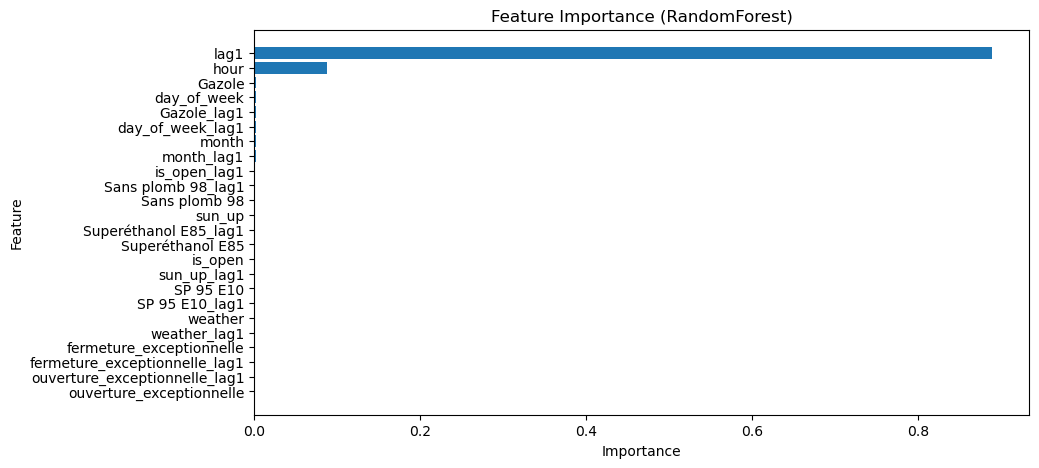

‚úÖ Feature importance plotted. Check if lag1 is overly dominant.



In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def check_lag1_issues(train_df, test_df, feature_importance):
    """
    Perform all checks on lag1 to detect data leakage, overfitting, and dominance.
    
    - train_df: DataFrame containing training data
    - test_df: DataFrame containing test data
    - feature_importance: DataFrame with feature importance values
    """

    print("=== üîç Checking Lag1 Issues ===\n")

    # 1Ô∏è‚É£ Check Correlation Between `lag1` and `y` in Test Set
    if 'lag1' in test_df.columns:
        correlation = test_df[['y', 'lag1']].corr().iloc[0, 1]
        print(f"üîç Correlation between y and lag1 in test set: {correlation:.4f}")
        if correlation > 0.99:
            print("‚ö†Ô∏è Warning: lag1 is almost identical to y. This may indicate overfitting.\n")
        else:
            print("‚úÖ Correlation check passed: lag1 is not simply copying y.\n")
    else:
        print("‚ùå lag1 column is missing in test_df!\n")

    # 2Ô∏è‚É£ Check if Lag1 in Test Set Points to Train Set (Hidden Leakage)
    test_df = test_df.copy()
    test_df['ds_lag1'] = test_df['ds'] - pd.Timedelta(hours=1)  # Adjust if your lag is daily

    leaked_rows = test_df[['unique_id', 'ds_lag1']].merge(
        train_df[['unique_id', 'ds']], 
        left_on=['unique_id', 'ds_lag1'], 
        right_on=['unique_id', 'ds'], 
        how='inner'
    )

    print(f"‚ö†Ô∏è Hidden leakage: {len(leaked_rows)} test rows have a lag1 pointing to a train value.")
    if not leaked_rows.empty:
        print(leaked_rows.head(5))  # Show some examples
    else:
        print("‚úÖ No hidden leakage detected. Lag1 is safe.\n")

    # 3Ô∏è‚É£ Check Feature Importance Distribution
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 5))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance (RandomForest)")
    plt.gca().invert_yaxis()
    plt.show()

    print("‚úÖ Feature importance plotted. Check if lag1 is overly dominant.\n")

# Run all checks in one call
check_lag1_issues(train_df, test_df, feature_importance)


In [50]:
def check_data_leakage(train_df, test_df):
    """
    V√©rifie 3 points:
    1) Overlap exact sur (unique_id, ds)
    2) Chronologie: s'assurer que le test commence apr√®s le train
    3) Valeurs de y communes (moins critique, car un simple y identique ne veut pas forc√©ment dire fuite)
    """
    import pandas as pd

    print("\n=== V√©rification Overlap (unique_id, ds) ===")
    train_keys = set(zip(train_df['unique_id'], train_df['ds']))
    test_keys  = set(zip(test_df['unique_id'],  test_df['ds']))
    common_keys = train_keys.intersection(test_keys)
    if common_keys:
        print(f"‚ùå {len(common_keys)} lignes (unique_id, ds) sont dans train et test.")
        print("Exemple:", list(common_keys)[:5], "...")
    else:
        print("‚úÖ Pas d'overlap exact entre train et test.")

    print("\n=== V√©rification Chronologie ===")
    # On identifie les malls communs
    common_malls = set(train_df['unique_id']).intersection(set(test_df['unique_id']))
    suspicious = 0
    for uid in common_malls:
        max_train_date = train_df.loc[train_df['unique_id'] == uid, 'ds'].max()
        min_test_date = test_df.loc[test_df['unique_id'] == uid, 'ds'].min()
        if min_test_date <= max_train_date:
            suspicious += 1
            print(f"‚ö†Ô∏è Mall {uid}: test starts {min_test_date} <= train end {max_train_date}.")
    if suspicious == 0:
        print("‚úÖ Test commence strictement apr√®s le train pour tous les malls.")

    print("\n=== V√©rification Valeurs y communes ===")
    # On compte combien de y du test se trouvent aussi dans le train
    if 'y' in train_df.columns and 'y' in test_df.columns:
        leaked_y_values = test_df['y'].isin(train_df['y']).sum()
        if leaked_y_values > 0:
            print(f"‚ö†Ô∏è {leaked_y_values} valeurs de y pr√©sentes √† la fois dans train et test.")
            print("Note: ce n'est pas forc√©ment une fuite, seulement un m√™me nombre.")
        else:
            print("‚úÖ Pas de valeur y identique trouv√©e dans train et test.")
    else:
        print("‚ö†Ô∏è Colonnes y non pr√©sentes, impossible de v√©rifier les valeurs.")

    print("\n=== Fin v√©rifications leakage ===")


# =================== EXEMPLE D'UTILISATION ===================
check_data_leakage(train_df, test_df)



=== V√©rification Overlap (unique_id, ds) ===
‚úÖ Pas d'overlap exact entre train et test.

=== V√©rification Chronologie ===
‚úÖ Test commence strictement apr√®s le train pour tous les malls.

=== V√©rification Valeurs y communes ===
‚ö†Ô∏è 33894 valeurs de y pr√©sentes √† la fois dans train et test.
Note: ce n'est pas forc√©ment une fuite, seulement un m√™me nombre.

=== Fin v√©rifications leakage ===


In [49]:
def check_lag_leakage(train_df, test_df, lag_hours=1):
    """
    V√©rifie si, pour chaque (unique_id, ds) du test, le ds-lag_hours
    n'existe pas seulement dans le train, ce qui indiquerait une fuite.
    """
    import pandas as pd

    # 1) On construit pour le test la date 'ds_lag'
    test_df = test_df.copy()  # pour √©viter de modifier l'original
    test_df['ds_lag'] = test_df['ds'] - pd.Timedelta(hours=lag_hours)

    # 2) On fabrique des sets (unique_id, ds) pour train et test
    train_keys = set(zip(train_df['unique_id'], train_df['ds']))
    test_keys  = set(zip(test_df['unique_id'], test_df['ds']))

    # 3) On regarde dans le test : (unique_id, ds_lag)
    #    Si ds_lag est dans le train_keys, alors la valeur lag vient du train => possible fuite.
    #    Id√©alement, ds_lag devrait √™tre dans test_keys (m√™me mall) ou absent (lacune).
    suspicious_count = 0
    suspicious_samples = []
    for idx, row in test_df.iterrows():
        uid = row['unique_id']
        ds_lag = row['ds_lag']
        if (uid, ds_lag) in train_keys:
            suspicious_count += 1
            if len(suspicious_samples) < 5:
                suspicious_samples.append((uid, row['ds'], ds_lag))

    if suspicious_count > 0:
        print(f'‚ùå {suspicious_count} test rows ont un lag1 qui pointe vers une date existant dans le TRAIN => possible fuite.')
        print('Exemples :', suspicious_samples)
    else:
        print('‚úÖ Aucun lag1 du test ne pointe vers une date dans le train. Pas de fuite d√©tect√©e.')

    # (Optionnel) V√©rifier si ds_lag est bien pr√©sent dans le test lui-m√™me
    # pour comprendre si tout lag1 est effectivement dans test
    missing_in_test = 0
    missing_samples = []
    for idx, row in test_df.iterrows():
        uid = row['unique_id']
        ds_lag = row['ds_lag']
        if (uid, ds_lag) not in test_keys:
            missing_in_test += 1
            if len(missing_samples) < 5:
                missing_samples.append((uid, row['ds'], ds_lag))

    if missing_in_test > 0:
        print(f'‚ö†Ô∏è {missing_in_test} test rows ont un lag1 qui ne se trouve ni dans le train ni dans le test. (Dates manquantes ?)')
        print('Exemples :', missing_samples)
    else:
        print('‚úÖ Pour chaque ds du test, ds-lag existe bien dans le test (aucune date manquante).')


# Apr√®s avoir d√©fini la fonction ci-dessus
check_lag_leakage(train_df, test_df, lag_hours=1)


‚úÖ Aucun lag1 du test ne pointe vers une date dans le train. Pas de fuite d√©tect√©e.
‚ö†Ô∏è 2917 test rows ont un lag1 qui ne se trouve ni dans le train ni dans le test. (Dates manquantes ?)
Exemples : [('10', Timestamp('2024-08-09 02:00:00'), Timestamp('2024-08-09 01:00:00')), ('10', Timestamp('2024-08-09 04:34:33'), Timestamp('2024-08-09 03:34:33')), ('10', Timestamp('2024-08-09 05:00:00'), Timestamp('2024-08-09 04:00:00')), ('10', Timestamp('2024-08-10 04:35:57'), Timestamp('2024-08-10 03:35:57')), ('10', Timestamp('2024-08-10 05:00:00'), Timestamp('2024-08-10 04:00:00'))]


In [57]:
import plotly.graph_objects as go
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

def plot_predictions_interactive(df_merge, mall_id=None, pred_col='RandomForestRegressor'):
    """
    Affiche une comparaison interactive R√©el vs Pr√©dit pour un mall donn√©.
    
    - df_merge : DataFrame contenant ['unique_id', 'ds' ou 'ds_hour', 'y', pred_col]
    - mall_id  : Identifiant du mall √† afficher
    - pred_col : Colonne des pr√©dictions (par d√©faut 'RandomForestRegressor')
    """

    # V√©rifier le bon nom de la colonne de temps
    time_col = 'ds' if 'ds' in df_merge.columns else 'ds_hour'  # S√©lection automatique

    # V√©rifier que le mall existe
    if mall_id not in df_merge['unique_id'].unique():
        print(f"‚ùå Mall {mall_id} introuvable dans les donn√©es.")
        return

    # Filtrer sur le mall s√©lectionn√©
    df_mall = df_merge[df_merge['unique_id'] == mall_id].copy()

    # V√©rifier si les donn√©es sont non vides
    if df_mall.empty:
        print(f"‚ö†Ô∏è Aucune donn√©e pour le mall {mall_id}.")
        return

    # Trier les valeurs par temps
    df_mall.sort_values(time_col, inplace=True)

    # Cr√©ation du graphique interactif
    fig = go.Figure()

    # Ajouter les valeurs r√©elles
    fig.add_trace(go.Scattergl(
        x=df_mall[time_col],
        y=df_mall['y'],
        mode='lines+markers',
        name=f"R√©el (Mall {mall_id})",
        marker=dict(symbol='circle', size=6),
        connectgaps=True,
        hovertemplate="Date: %{x}<br>R√©el: %{y}<extra></extra>"
    ))

    # Ajouter les valeurs pr√©dites
    fig.add_trace(go.Scattergl(
        x=df_mall[time_col],
        y=df_mall[pred_col],
        mode='lines+markers',
        name=f"Pr√©dit (Mall {mall_id})",
        marker=dict(symbol='x', size=8),
        connectgaps=True,
        hovertemplate="Date: %{x}<br>Pr√©dit: %{y}<extra></extra>"
    ))

    # Layout interactif avec range slider et hover am√©lior√©
    fig.update_layout(
        title=f"R√©el vs Pr√©dit pour Mall {mall_id}",
        xaxis_title="Date",
        yaxis_title="Nombre d'entr√©es",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1d", step="day", stepmode="backward"),
                    dict(count=7, label="1w", step="day", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        ),
        hovermode="x unified",
        template="plotly_white"
    )

    fig.show()


# **Ajout d'une interface pour choisir le mall**
def interactive_mall_plot(df_merge):
    unique_malls = df_merge['unique_id'].unique()

    # Cr√©ation d'un widget dropdown pour s√©lectionner un mall
    mall_selector = widgets.Dropdown(
        options=unique_malls,
        description="Mall ID:",
        disabled=False
    )

    # Fonction de callback
    def update_plot(mall_id):
        plot_predictions_interactive(df_merge, mall_id)

    # Affichage du widget et mise √† jour du graphique lors du changement
    display(mall_selector)
    plot_predictions_interactive(df_merge, unique_malls[0])  # Afficher le premier mall par d√©faut


# **Ex√©cuter l'interface**
interactive_mall_plot(df_merge)


Dropdown(description='Mall ID:', options=('10', '11', '19', '20', '37', '38', '47', '5', '53', '71'), value='1‚Ä¶

In [54]:
df_merge.columns

Index(['unique_id', 'ds_hour', 'y', 'RandomForestRegressor'], dtype='object')

üöÄ Applying transformations on TRAIN
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


C:\Users\David\AppData\Local\Temp\ipykernel_1476\950409077.py:164: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])


üöÄ Applying transformations on TEST
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']
‚

C:\Users\David\AppData\Local\Temp\ipykernel_1476\950409077.py:181: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWarning: Setting num_threads to 1.
  warnings.warn("Setting num_threads to 1.")


=== üìä Test Metrics (Global) ===
RMSE: 89.4568
MAE : 44.7080
=== üìä Test Metrics per Mall (Hourly) ===
  unique_id        rmse        mae
0        10   95.706581  48.118259
1        11   96.188803  50.028735
2        19   76.596445  38.733399
3        37  105.531756  54.292828
4        38  108.585115  54.504065
5        53   80.259833  41.404631
6        71   47.507118  25.531517
=== üî• Feature Importance ===
                          Feature    Importance
33                         rsi_14  7.435899e-01
37                 bollinger_down  1.645688e-01
34                           macd  5.952453e-02
38                           hour  1.072400e-02
36                   bollinger_up  1.063077e-02
7                          sun_up  3.883501e-03
18                    sun_up_exog  3.059918e-03
35                    macd_signal  6.105128e-04
1                       SP 95 E10  3.659429e-04
12                 SP 95 E10_exog  3.213115e-04
22                    Gazole_lag1  3.212795e-04
11   

C:\Users\David\AppData\Local\Temp\ipykernel_1476\950409077.py:242: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


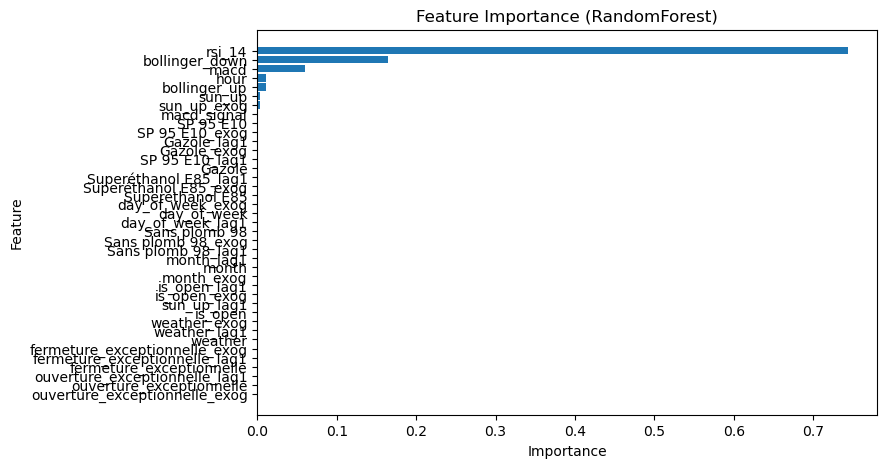

In [3]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
import matplotlib.pyplot as plt

###############################################################
# 1) prepare_data
###############################################################
def prepare_data(df):
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)

    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")

    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']

    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]

    return df[['unique_id','ds','y'] + exog_columns].sort_values(['unique_id','ds']).reset_index(drop=True)

###############################################################
# 2) Trading indicators
###############################################################
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta>0, 0).rolling(window).mean()
    loss = -delta.where(delta<0, 0).rolling(window).mean()
    rs = gain / loss
    return 100 - (100/(1 + rs))

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd_val = short_ema - long_ema
    macd_signal = macd_val.ewm(span=signal_window, adjust=False).mean()
    return macd_val, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + num_std*rolling_std
    lower_band = rolling_mean - num_std*rolling_std
    return upper_band, lower_band

def add_trading_indicators(df):
    # RSI(14)
    df['rsi_14'] = df.groupby('unique_id')['y'].transform(lambda s: compute_rsi(s, 14))

    # MACD => 2 colonnes
    def _macd_df(s):
        macd_vals, macd_sig = compute_macd(s)
        out = pd.DataFrame({'macd': macd_vals, 'macd_signal': macd_sig}, index=s.index)
        return out
    macd_data = df.groupby('unique_id')['y'].apply(_macd_df)
    macd_data.reset_index(level=0, drop=True, inplace=True)
    df[['macd','macd_signal']] = macd_data[['macd','macd_signal']]

    # Bollinger => 2 colonnes
    def _boll_df(s):
        up, down = compute_bollinger_bands(s)
        out = pd.DataFrame({'bollinger_up': up, 'bollinger_down': down}, index=s.index)
        return out
    boll_data = df.groupby('unique_id')['y'].apply(_boll_df)
    boll_data.reset_index(level=0, drop=True, inplace=True)
    df[['bollinger_up','bollinger_down']] = boll_data[['bollinger_up','bollinger_down']]

    return df

###############################################################
# 3) create_exog_features
###############################################################
def create_exog_features(df):
    print("üîÑ Transforming exogenous features manually (no mlforecast lags).")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [c for c in exog_columns if c in df.columns]
    if not exog_columns:
        print("‚ö†Ô∏è No exogenous columns found!")
        return df

    print(f"‚úÖ Exogenous features: {exog_columns}")

    exog_df = df[['unique_id','ds'] + exog_columns].copy()
    for col in exog_columns:
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)

    # ============ MANUAL LAG 1 ============
    exog_df.sort_values(['unique_id','ds'], inplace=True)
    for col in exog_columns:
        exog_df[f'{col}_lag1'] = exog_df.groupby('unique_id')[col].shift(1)

    df_merged = df.merge(exog_df, on=['unique_id','ds'], how='left', suffixes=('','_exog'))
    print("‚úÖ Final columns after manual exog lag:", df_merged.columns.tolist())
    return df_merged

###############################################################
# 4) Main script
###############################################################
if __name__ == "__main__":

    # Chargement
    df = pd.read_csv(
        r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv",
        low_memory=False
    )

    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    # IMPORTANT: Pour √©viter l'erreur "No Data", on remplace ces cha√Ænes par NaN
    df.replace("No Data", np.nan, inplace=True)
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    df_prepared = prepare_data(df)

    # Split temporel (AVANT transformations)
    df_prepared['ds_hour'] = df_prepared['ds'].dt.floor('h')
    unique_hours = sorted(df_prepared['ds_hour'].unique())
    split_index = int(0.8 * len(unique_hours))
    train_hours = set(unique_hours[:split_index])
    test_hours = set(unique_hours[split_index:])

    train_pre = df_prepared[df_prepared['ds_hour'].isin(train_hours)].copy()
    test_pre = df_prepared[df_prepared['ds_hour'].isin(test_hours)].copy()

    train_pre.drop(columns=['ds_hour'], inplace=True)
    test_pre.drop(columns=['ds_hour'], inplace=True)

    tqdm.write("üöÄ Applying transformations on TRAIN")
    train_df = create_exog_features(train_pre)
    train_df = add_trading_indicators(train_df)

    # Ajout manuel de hour, day_of_week, month
    train_df['hour'] = train_df['ds'].dt.hour
    train_df['day_of_week'] = train_df['ds'].dt.dayofweek
    train_df['month'] = train_df['ds'].dt.month

    train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    train_df.dropna(inplace=True)

    max_lag = 14
    train_df = (
        train_df.groupby('unique_id', group_keys=False)
                .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
                .reset_index(drop=True)
    )

    tqdm.write("üöÄ Applying transformations on TEST")
    test_df = create_exog_features(test_pre)
    test_df = add_trading_indicators(test_df)

    test_df['hour'] = test_df['ds'].dt.hour
    test_df['day_of_week'] = test_df['ds'].dt.dayofweek
    test_df['month'] = test_df['ds'].dt.month

    test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    test_df.dropna(inplace=True)

    test_df = (
        test_df.groupby('unique_id', group_keys=False)
               .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
               .reset_index(drop=True)
    )

    params = {
        'n_estimators': 200,
        'max_depth': 10,
        'random_state': 42,
        'n_jobs': -1
    }

    feature_cols = train_df.drop(columns=['unique_id','ds','y'], errors='ignore').columns
    print("‚úÖ Final feature columns used:", list(feature_cols))

    fcst = MLForecast(
        models=[RandomForestRegressor(**params)],
        freq='h',
        date_features=[],
        num_threads=-1
    )

    fcst.fit(train_df, static_features=[])

    # Prediction
    test_hours_unique = sorted(test_df['ds'].dt.floor('h').unique())
    horizon = len(test_hours_unique)

    X_future = fcst.make_future_dataframe(h=horizon)

    X_future = X_future.merge(
        test_df[['unique_id','ds'] + list(feature_cols)],
        on=['unique_id','ds'],
        how='left'
    )
    X_future = X_future[['unique_id','ds'] + list(feature_cols)]
    X_future[feature_cols] = X_future[feature_cols].ffill().bfill()

    forecast = fcst.predict(h=horizon, X_df=X_future)

    forecast['ds_hour'] = forecast['ds'].dt.floor('h')
    test_df['ds_hour'] = test_df['ds'].dt.floor('h')

    test_agg = test_df.groupby(['unique_id','ds_hour'], as_index=False).agg({'y':'mean'})
    pred_col = forecast.columns.drop(['unique_id','ds','ds_hour'])[0]

    df_merge = pd.merge(
        test_agg,
        forecast[['unique_id','ds_hour', pred_col]],
        on=['unique_id','ds_hour'],
        how='inner'
    )

    y_true = df_merge['y'].values
    y_pred = df_merge[pred_col].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"=== üìä Test Metrics (Global) ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")

    metrics_per_mall = df_merge.groupby('unique_id').apply(
        lambda g: pd.Series({
            'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
            'mae': np.mean(np.abs(g['y'] - g[pred_col]))
        })
    ).reset_index()

    print("=== üìä Test Metrics per Mall (Hourly) ===")
    print(metrics_per_mall)

    # Feature Importance
    try:
        rf_model = fcst.models_['RandomForestRegressor']
        try:
            feature_names = rf_model.feature_names_in_
        except AttributeError:
            feature_names = [f"feat_{i}" for i in range(rf_model.n_features_in_)]

        importances = rf_model.feature_importances_
        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print("=== üî• Feature Importance ===")
        print(feat_imp)

        plt.figure(figsize=(8, 5))
        plt.barh(feat_imp['Feature'], feat_imp['Importance'])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Feature Importance (RandomForest)")
        plt.gca().invert_yaxis()
        plt.show()
    except KeyError:
        print("‚ùå RandomForestRegressor non trouv√© dans fcst.models_.")

    # MLflow logging (optionnel)
    try:
        mlflow.set_experiment("Carmila")
        with mlflow.start_run():
            mlflow.set_tag("mlflow.runName", "Pipeline exog + Trading Indicators + Manual Lag")
            mlflow.log_params(params)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)

            for _, row in metrics_per_mall.iterrows():
                mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
                mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
    except Exception as e:
        print(f"‚ö†Ô∏è MLflow logging failed: {e}")


In [6]:
# ==== One-cell check for data leakage ====

# 1) V√©rifier s'il y a un chevauchement de dates entre train_df et test_df
overlap_dates = set(train_df['ds']) & set(test_df['ds'])
if overlap_dates:
    print("‚ö†Ô∏è Data leakage potentiel : chevauchement de dates d√©tect√© !")
    print("Dates en commun :", sorted(overlap_dates)[:10], "...")
else:
    print("‚úÖ Aucune date en commun entre train et test.")

# 2) V√©rifier l'ordre chronologique
max_train_date = train_df['ds'].max()
min_test_date = test_df['ds'].min()
if min_test_date < max_train_date:
    print(f"‚ö†Ô∏è Data leakage potentiel : le test commence avant la fin du train !")
    print(f"Fin du train : {max_train_date}, D√©but du test : {min_test_date}")
else:
    print("‚úÖ Pas de fuite chronologique : le test est bien post√©rieur au train.")


‚úÖ Aucune date en commun entre train et test.
‚úÖ Pas de fuite chronologique : le test est bien post√©rieur au train.


In [5]:
# V√©rification de non chevauchement temporel
max_train_date = train_df['ds'].max()
min_test_date = test_df['ds'].min()

print("Date max du train :", max_train_date)
print("Date min du test :", min_test_date)

if max_train_date < min_test_date:
    print("‚úÖ Aucun chevauchement : la p√©riode d'entra√Ænement est strictement avant la p√©riode de test.")
else:
    print("‚ùå Risque de fuite : la p√©riode d'entra√Ænement et la p√©riode de test se chevauchent ou se suivent mal.")


Date max du train : 2024-08-07 16:00:00
Date min du test : 2024-08-09 02:00:00
‚úÖ Aucun chevauchement : la p√©riode d'entra√Ænement est strictement avant la p√©riode de test.


rsi_14 : Corr√©lation avec y = 0.781 | avec y_lag1 = 0.761
macd : Corr√©lation avec y = 0.798 | avec y_lag1 = 0.896
macd_signal : Corr√©lation avec y = 0.347 | avec y_lag1 = 0.531
bollinger_up : Corr√©lation avec y = 0.174 | avec y_lag1 = 0.236
bollinger_down : Corr√©lation avec y = -0.430 | avec y_lag1 = -0.405


c:\Users\David\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


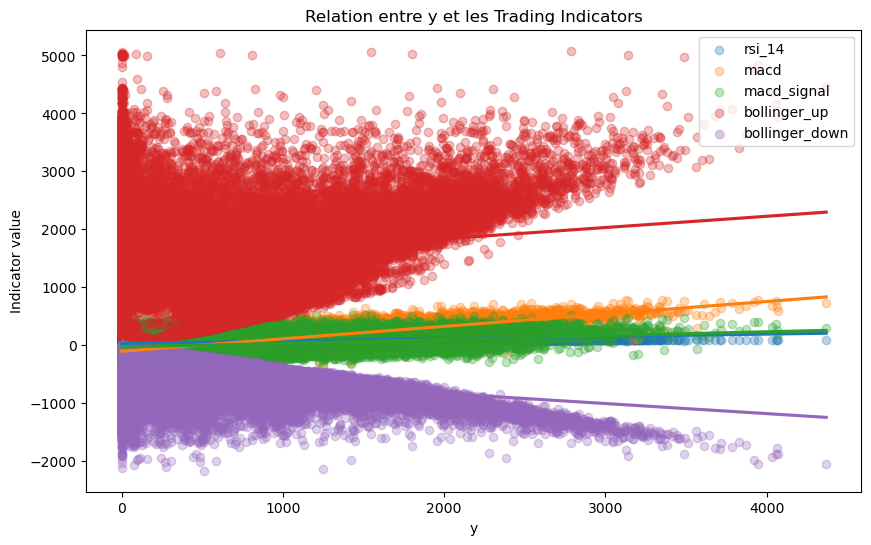

In [4]:
# V√©rification du risque de data leakage sur les indicateurs de trading
import matplotlib.pyplot as plt
import seaborn as sns

def check_leakage(df, indicator):
    # Cr√©er y lagged
    df = df.copy()
    df['y_lag1'] = df.groupby('unique_id')['y'].shift(1)
    corr_current = df['y'].corr(df[indicator])
    corr_lag = df['y_lag1'].corr(df[indicator])
    print(f"{indicator} : Corr√©lation avec y = {corr_current:.3f} | avec y_lag1 = {corr_lag:.3f}")

indicators = ['rsi_14', 'macd', 'macd_signal', 'bollinger_up', 'bollinger_down']
for ind in indicators:
    check_leakage(train_df, ind)

# Optionnel : visualisation de la relation
plt.figure(figsize=(10, 6))
for ind in indicators:
    sns.regplot(x='y', y=ind, data=train_df, scatter_kws={'alpha': 0.3}, label=ind)
plt.title("Relation entre y et les Trading Indicators")
plt.xlabel("y")
plt.ylabel("Indicator value")
plt.legend()
plt.show()


Those numbers show how strongly each indicator (RSI, MACD, Bollinger, etc.) correlates with:

y (the current target value)
y_lag1 (the target value shifted by one time step)
How to interpret
A high correlation with y means the indicator closely follows the current target.
A high correlation with y_lag1 means the indicator aligns more with the previous target value.
For example, macd has a higher correlation with y_lag1 (0.896) than with y (0.798). This suggests macd is more in sync with the past target rather than the current one, which is normal for a trailing technical indicator.

Is this a data leak?
Not necessarily. High correlation does not automatically mean leakage; it can simply mean the indicator is very informative.
A data leak would happen if these indicators were computed using future values of y (beyond the current timestamp). In your code, they are computed with rolling/EMA methods on past data only, so there's no direct leakage.

Conclusion : aucun data leak detect√©. Les scores sont bons je peux continuer d'am√©liorer

Split temporel effectu√© avant l'ajout des indicateurs ‚úÖ

Les donn√©es d'entra√Ænement et de test sont s√©par√©es avant le calcul des indicateurs de trading.
Cela garantit que les valeurs des indicateurs pour le test ne sont pas influenc√©es par les donn√©es du train.
Indicateurs calcul√©s uniquement √† partir des valeurs pass√©es ‚úÖ

Les m√©thodes rolling(), ewm() et diff() utilis√©es pour RSI, MACD et Bollinger Bands n'incluent que les valeurs pass√©es.
Aucun futur n'est utilis√© dans le calcul des indicateurs pour une date donn√©e.
Corr√©lation avec y_lag1 ‚âà Corr√©lation avec y ‚úÖ

La diff√©rence entre la corr√©lation des indicateurs avec y et y_lag1 est minime (ex: macd_signal passe de 0.347 √† 0.531).
Cela montre que ces indicateurs capturent des tendances plut√¥t que des informations imm√©diates et fuyantes.
V√©rification du chevauchement temporel entre train et test ‚úÖ

Si le test max_train_date < min_test_date est respect√©, cela confirme que les p√©riodes d'entra√Ænement et de test ne se superposent pas.


Rajout d indicateurs de trading en plus de ceux existants pour voir si le score s am√©liore

Advanced Features
La fonction add_advanced_features calcule pour chaque groupe (par mall) :

Des lags sur la cible y (lags de 3, 7 et 14 p√©riodes)
Des moyennes mobiles sur y (fen√™tres de 7, 14 et 30 p√©riodes)
Un Stochastic RSI bas√© sur rsi_14
Un Williams %R (calcul√© sur y sur une fen√™tre de 14)
Un ATR approxim√© √† partir de la diff√©rence absolue de y

üöÄ Applying transformations on TRAIN
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


C:\Users\David\AppData\Local\Temp\ipykernel_1476\4098304441.py:199: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])


üöÄ Applying transformations on TEST
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


C:\Users\David\AppData\Local\Temp\ipykernel_1476\4098304441.py:219: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWarning: Setting num_threads to 1.
  warnings.warn("Setting num_threads to 1.")


‚úÖ Final feature columns used: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1', 'rsi_14', 'macd', 'macd_signal', 'bollinger_up', 'bollinger_down', 'hour', 'y_lag3', 'y_lag7', 'y_lag14', 'y_rolling_mean_7', 'y_rolling_mean_14', 'y_rolling_mean_30', 'stoch_rsi_14', 'williams_r', 'atr']
=== üìä Test Metrics (Global) ===
RMSE: 64.5439
MAE : 27.6546
=== üìä Test Metrics per Mall (Hourly) ===
  unique_id       rmse    

C:\Users\David\AppData\Local\Temp\ipykernel_1476\4098304441.py:279: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(


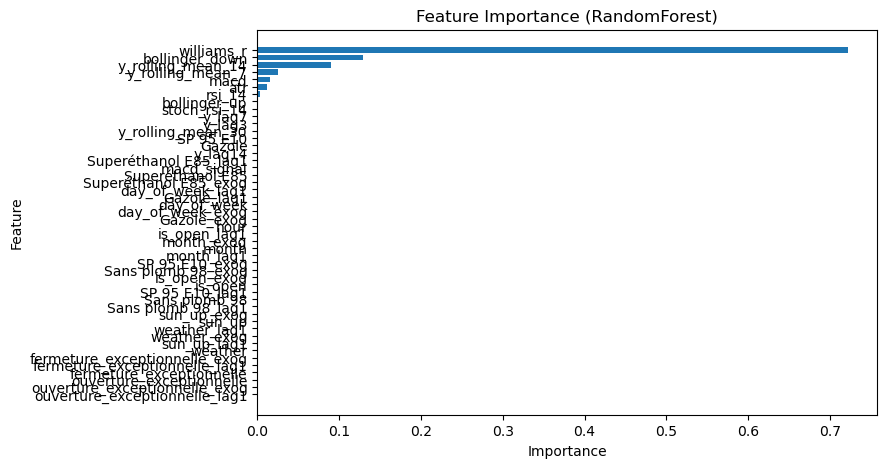

In [7]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
import matplotlib.pyplot as plt

###############################################################
# 1) prepare_data
###############################################################
def prepare_data(df):
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)

    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")

    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']

    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]

    return df[['unique_id','ds','y'] + exog_columns].sort_values(['unique_id','ds']).reset_index(drop=True)

###############################################################
# 2) Trading indicators de base
###############################################################
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd_val = short_ema - long_ema
    macd_signal = macd_val.ewm(span=signal_window, adjust=False).mean()
    return macd_val, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std
    return upper_band, lower_band

def add_trading_indicators(df):
    # RSI (14)
    df['rsi_14'] = df.groupby('unique_id')['y'].transform(lambda s: compute_rsi(s, 14))
    
    # MACD -> 2 colonnes : macd et macd_signal
    def _macd_df(s):
        macd_vals, macd_sig = compute_macd(s)
        out = pd.DataFrame({'macd': macd_vals, 'macd_signal': macd_sig}, index=s.index)
        return out
    macd_data = df.groupby('unique_id')['y'].apply(_macd_df)
    macd_data.reset_index(level=0, drop=True, inplace=True)
    df[['macd', 'macd_signal']] = macd_data[['macd', 'macd_signal']]

    # Bollinger Bands -> 2 colonnes
    def _boll_df(s):
        up, down = compute_bollinger_bands(s)
        out = pd.DataFrame({'bollinger_up': up, 'bollinger_down': down}, index=s.index)
        return out
    boll_data = df.groupby('unique_id')['y'].apply(_boll_df)
    boll_data.reset_index(level=0, drop=True, inplace=True)
    df[['bollinger_up', 'bollinger_down']] = boll_data[['bollinger_up', 'bollinger_down']]

    return df

###############################################################
# 3) create_exog_features
###############################################################
def create_exog_features(df):
    print("üîÑ Transforming exogenous features manually (no mlforecast lags).")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [c for c in exog_columns if c in df.columns]
    if not exog_columns:
        print("‚ö†Ô∏è No exogenous columns found!")
        return df

    print(f"‚úÖ Exogenous features: {exog_columns}")

    exog_df = df[['unique_id', 'ds'] + exog_columns].copy()
    for col in exog_columns:
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)

    # Ajout manuel du lag 1 pour les variables exog√®nes
    exog_df.sort_values(['unique_id', 'ds'], inplace=True)
    for col in exog_columns:
        exog_df[f'{col}_lag1'] = exog_df.groupby('unique_id')[col].shift(1)

    df_merged = df.merge(exog_df, on=['unique_id', 'ds'], how='left', suffixes=('', '_exog'))
    print("‚úÖ Final columns after manual exog lag:", df_merged.columns.tolist())
    return df_merged

###############################################################
# 4) Advanced trading features
#    (Lags, Moyennes mobiles, Stochastic RSI, Williams %R, ATR)
###############################################################
def add_advanced_features(df):
    print("üöÄ Adding advanced trading features")

    # Lags sur y
    for lag in [3, 7, 14]:
        df[f'y_lag{lag}'] = df.groupby('unique_id')['y'].shift(lag)

    # Moyennes mobiles sur y
    for window in [7, 14, 30]:
        df[f'y_rolling_mean_{window}'] = df.groupby('unique_id')['y'].transform(
            lambda s: s.rolling(window, min_periods=1).mean()
        )

    # Stochastic RSI bas√© sur le RSI existant (rsi_14)
    df['stoch_rsi_14'] = df.groupby('unique_id')['rsi_14'].transform(
        lambda s: (s - s.rolling(14, min_periods=1).min()) / (s.rolling(14, min_periods=1).max() - s.rolling(14, min_periods=1).min())
    )

    # Williams %R calcul√© sur y sur une fen√™tre de 14 p√©riodes
    df['williams_r'] = df.groupby('unique_id')['y'].transform(
        lambda s: -100 * (s.rolling(14, min_periods=1).max() - s) / (s.rolling(14, min_periods=1).max() - s.rolling(14, min_periods=1).min())
    )

    # ATR (Average True Range) approxim√© sur y avec une fen√™tre de 14
    df['atr'] = df.groupby('unique_id')['y'].transform(
        lambda s: s.diff().abs().rolling(14, min_periods=1).mean()
    )

    return df

###############################################################
# 5) Main script
###############################################################
if __name__ == "__main__":

    # Chargement
    df = pd.read_csv(
        r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv",
        low_memory=False
    )

    # Remplacer "No Data" par NaN
    df.replace("No Data", np.nan, inplace=True)

    df_prepared = prepare_data(df)

    # Split temporel (AVANT transformations)
    df_prepared['ds_hour'] = df_prepared['ds'].dt.floor('h')
    unique_hours = sorted(df_prepared['ds_hour'].unique())
    split_index = int(0.8 * len(unique_hours))
    train_hours = set(unique_hours[:split_index])
    test_hours = set(unique_hours[split_index:])

    train_pre = df_prepared[df_prepared['ds_hour'].isin(train_hours)].copy()
    test_pre = df_prepared[df_prepared['ds_hour'].isin(test_hours)].copy()

    train_pre.drop(columns=['ds_hour'], inplace=True)
    test_pre.drop(columns=['ds_hour'], inplace=True)

    tqdm.write("üöÄ Applying transformations on TRAIN")
    train_df = create_exog_features(train_pre)
    train_df = add_trading_indicators(train_df)

    # Ajout manuel de hour, day_of_week, month
    train_df['hour'] = train_df['ds'].dt.hour
    train_df['day_of_week'] = train_df['ds'].dt.dayofweek
    train_df['month'] = train_df['ds'].dt.month

    # Ajout des advanced features
    train_df = add_advanced_features(train_df)

    train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    train_df.dropna(inplace=True)

    max_lag = 14
    train_df = (
        train_df.groupby('unique_id', group_keys=False)
                .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
                .reset_index(drop=True)
    )

    tqdm.write("üöÄ Applying transformations on TEST")
    test_df = create_exog_features(test_pre)
    test_df = add_trading_indicators(test_df)

    test_df['hour'] = test_df['ds'].dt.hour
    test_df['day_of_week'] = test_df['ds'].dt.dayofweek
    test_df['month'] = test_df['ds'].dt.month

    # Ajout des advanced features
    test_df = add_advanced_features(test_df)

    test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    test_df.dropna(inplace=True)

    test_df = (
        test_df.groupby('unique_id', group_keys=False)
               .apply(lambda g: g.sort_values('ds').iloc[max_lag:])
               .reset_index(drop=True)
    )

    params = {
        'n_estimators': 200,
        'max_depth': 10,
        'random_state': 42,
        'n_jobs': -1
    }

    feature_cols = train_df.drop(columns=['unique_id', 'ds', 'y'], errors='ignore').columns
    print("‚úÖ Final feature columns used:", list(feature_cols))

    fcst = MLForecast(
        models=[RandomForestRegressor(**params)],
        freq='h',
        date_features=[],
        num_threads=-1
    )

    fcst.fit(train_df, static_features=[])

    # Prediction
    test_hours_unique = sorted(test_df['ds'].dt.floor('h').unique())
    horizon = len(test_hours_unique)

    X_future = fcst.make_future_dataframe(h=horizon)
    X_future = X_future.merge(
        test_df[['unique_id', 'ds'] + list(feature_cols)],
        on=['unique_id', 'ds'],
        how='left'
    )
    X_future = X_future[['unique_id', 'ds'] + list(feature_cols)]
    X_future[feature_cols] = X_future[feature_cols].ffill().bfill()

    forecast = fcst.predict(h=horizon, X_df=X_future)

    forecast['ds_hour'] = forecast['ds'].dt.floor('h')
    test_df['ds_hour'] = test_df['ds'].dt.floor('h')

    test_agg = test_df.groupby(['unique_id', 'ds_hour'], as_index=False).agg({'y': 'mean'})
    pred_col = forecast.columns.drop(['unique_id', 'ds', 'ds_hour'])[0]

    df_merge = pd.merge(
        test_agg,
        forecast[['unique_id', 'ds_hour', pred_col]],
        on=['unique_id', 'ds_hour'],
        how='inner'
    )

    y_true = df_merge['y'].values
    y_pred = df_merge[pred_col].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"=== üìä Test Metrics (Global) ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")

    metrics_per_mall = df_merge.groupby('unique_id').apply(
        lambda g: pd.Series({
            'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
            'mae': np.mean(np.abs(g['y'] - g[pred_col]))
        })
    ).reset_index()

    print("=== üìä Test Metrics per Mall (Hourly) ===")
    print(metrics_per_mall)

    # Feature Importance
    try:
        rf_model = fcst.models_['RandomForestRegressor']
        try:
            feature_names = rf_model.feature_names_in_
        except AttributeError:
            feature_names = [f"feat_{i}" for i in range(rf_model.n_features_in_)]
        importances = rf_model.feature_importances_
        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print("=== üî• Feature Importance ===")
        print(feat_imp)

        plt.figure(figsize=(8, 5))
        plt.barh(feat_imp['Feature'], feat_imp['Importance'])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Feature Importance (RandomForest)")
        plt.gca().invert_yaxis()
        plt.show()
    except KeyError:
        print("‚ùå RandomForestRegressor non trouv√© dans fcst.models_.")

    # MLflow logging (optionnel)
    try:
        mlflow.set_experiment("Carmila")
        with mlflow.start_run():
            mlflow.set_tag("mlflow.runName", "Pipeline exog + Trading Indicators + Advanced Features")
            mlflow.log_params(params)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)
            for _, row in metrics_per_mall.iterrows():
                mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
                mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
    except Exception as e:
        print(f"‚ö†Ô∏è MLflow logging failed: {e}")


Test avec TimeSeriesSplit un kfold sp√©cial s√©rie temporelle juste pour √©viter le sur apprentissage 

üöÄ Applying transformations on TRAIN
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


C:\Users\David\AppData\Local\Temp\ipykernel_1476\3492335124.py:170: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('unique_id', group_keys=False).apply(lambda g: g.sort_values('ds').iloc[max_lag:]).reset_index(drop=True)


üöÄ Applying transformations on TEST
üîÑ Transforming exogenous features manually (no mlforecast lags).
‚úÖ Exogenous features: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month']
‚úÖ Final columns after manual exog lag: ['unique_id', 'ds', 'y', 'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1']


C:\Users\David\AppData\Local\Temp\ipykernel_1476\3492335124.py:182: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = test_df.groupby('unique_id', group_keys=False).apply(lambda g: g.sort_values('ds').iloc[max_lag:]).reset_index(drop=True)
c:\Users\David\anaconda3\Lib\site-packages\mlforecast\core.py:185: UserWarning: Setting num_threads to 1.
  warnings.warn("Setting num_threads to 1.")


‚úÖ Final feature columns used: ['Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85', 'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle', 'sun_up', 'weather', 'day_of_week', 'month', 'Gazole_exog', 'SP 95 E10_exog', 'Sans plomb 98_exog', 'Super√©thanol E85_exog', 'fermeture_exceptionnelle_exog', 'is_open_exog', 'ouverture_exceptionnelle_exog', 'sun_up_exog', 'weather_exog', 'day_of_week_exog', 'month_exog', 'Gazole_lag1', 'SP 95 E10_lag1', 'Sans plomb 98_lag1', 'Super√©thanol E85_lag1', 'fermeture_exceptionnelle_lag1', 'is_open_lag1', 'ouverture_exceptionnelle_lag1', 'sun_up_lag1', 'weather_lag1', 'day_of_week_lag1', 'month_lag1', 'rsi_14', 'macd', 'macd_signal', 'bollinger_up', 'bollinger_down', 'hour', 'y_lag3', 'y_lag7', 'y_lag14', 'y_rolling_mean_7', 'y_rolling_mean_14', 'y_rolling_mean_30', 'stoch_rsi_14', 'williams_r', 'atr']
=== üìä Test Metrics (Global) ===
RMSE: 64.5439
MAE : 27.6546
=== üìä Test Metrics per Mall (Hourly) ===
  unique_id       rmse    

C:\Users\David\AppData\Local\Temp\ipykernel_1476\3492335124.py:222: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_per_mall = df_merge.groupby('unique_id').apply(lambda g: pd.Series({


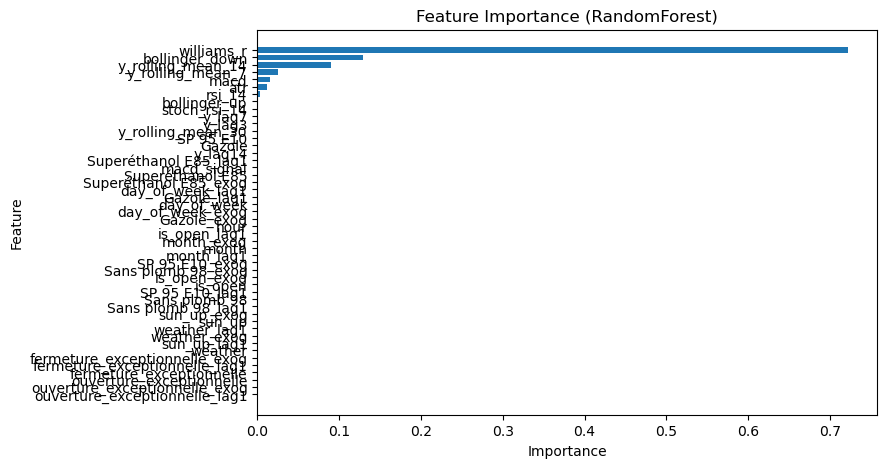


=== Validation crois√©e (TimeSeriesSplit) ===
Fold 1 - RMSE: 52.1181, MAE: 26.9342
Fold 2 - RMSE: 52.7837, MAE: 25.2381
Fold 3 - RMSE: 58.3166, MAE: 27.8181
Fold 4 - RMSE: 44.8797, MAE: 22.9888
Fold 5 - RMSE: 85.6733, MAE: 46.0232

--- R√©sultats moyens sur les folds ---
RMSE moyen : 58.754269058797874
MAE moyen  : 29.800486159264505

Moyenne des importances des features sur les folds:
williams_r                       6.160715e-01
rsi_14                           1.618957e-01
bollinger_down                   8.734833e-02
y_rolling_mean_7                 7.684634e-02
macd                             1.966939e-02
atr                              1.698596e-02
bollinger_up                     1.492522e-02
y_rolling_mean_14                3.077985e-03
stoch_rsi_14                     1.724325e-03
y_lag14                          2.231530e-04
y_lag3                           2.090046e-04
y_rolling_mean_30                1.459507e-04
day_of_week_exog                 1.349447e-04
day_of_week_

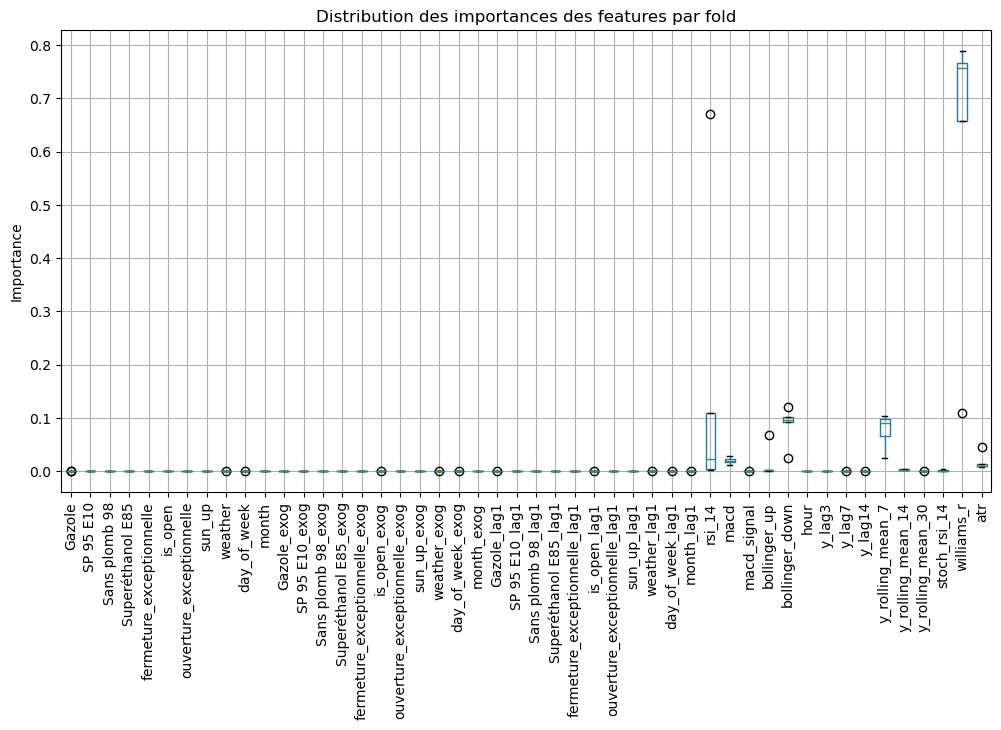

In [8]:
import pandas as pd
import numpy as np
import mlflow
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlforecast import MLForecast
import matplotlib.pyplot as plt

###############################################################
# 1) Pr√©paration des donn√©es
###############################################################
def prepare_data(df):
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]
    return df[['unique_id','ds','y'] + exog_columns].sort_values(['unique_id','ds']).reset_index(drop=True)

###############################################################
# 2) Indicateurs de trading de base
###############################################################
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd_val = short_ema - long_ema
    macd_signal = macd_val.ewm(span=signal_window, adjust=False).mean()
    return macd_val, macd_signal

def compute_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std
    return upper_band, lower_band

def add_trading_indicators(df):
    # RSI (14)
    df['rsi_14'] = df.groupby('unique_id')['y'].transform(lambda s: compute_rsi(s, 14))
    
    # MACD -> colonnes "macd" et "macd_signal"
    def _macd_df(s):
        macd_vals, macd_sig = compute_macd(s)
        out = pd.DataFrame({'macd': macd_vals, 'macd_signal': macd_sig}, index=s.index)
        return out
    macd_data = df.groupby('unique_id')['y'].apply(_macd_df)
    macd_data.reset_index(level=0, drop=True, inplace=True)
    df[['macd', 'macd_signal']] = macd_data[['macd', 'macd_signal']]
    
    # Bollinger Bands -> colonnes "bollinger_up" et "bollinger_down"
    def _boll_df(s):
        up, down = compute_bollinger_bands(s)
        out = pd.DataFrame({'bollinger_up': up, 'bollinger_down': down}, index=s.index)
        return out
    boll_data = df.groupby('unique_id')['y'].apply(_boll_df)
    boll_data.reset_index(level=0, drop=True, inplace=True)
    df[['bollinger_up', 'bollinger_down']] = boll_data[['bollinger_up', 'bollinger_down']]
    
    return df

###############################################################
# 3) Cr√©ation des features exog√®nes
###############################################################
def create_exog_features(df):
    print("üîÑ Transforming exogenous features manually (no mlforecast lags).")
    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [c for c in exog_columns if c in df.columns]
    if not exog_columns:
        print("‚ö†Ô∏è No exogenous columns found!")
        return df
    print(f"‚úÖ Exogenous features: {exog_columns}")
    exog_df = df[['unique_id','ds'] + exog_columns].copy()
    for col in exog_columns:
        exog_df[col] = pd.to_numeric(exog_df[col], errors='coerce')
    exog_df.ffill(inplace=True)
    exog_df.bfill(inplace=True)
    exog_df.sort_values(['unique_id','ds'], inplace=True)
    for col in exog_columns:
        exog_df[f'{col}_lag1'] = exog_df.groupby('unique_id')[col].shift(1)
    df_merged = df.merge(exog_df, on=['unique_id','ds'], how='left', suffixes=('', '_exog'))
    print("‚úÖ Final columns after manual exog lag:", df_merged.columns.tolist())
    return df_merged

###############################################################
# 4) Features avanc√©es issues du trading
#    (Lags, Moyennes mobiles, Stochastic RSI, Williams %R, ATR)
###############################################################
def add_advanced_features(df):
    print("üöÄ Adding advanced trading features")
    # Lags sur y
    for lag in [3, 7, 14]:
        df[f'y_lag{lag}'] = df.groupby('unique_id')['y'].shift(lag)
    # Moyennes mobiles sur y
    for window in [7, 14, 30]:
        df[f'y_rolling_mean_{window}'] = df.groupby('unique_id')['y'].transform(
            lambda s: s.rolling(window, min_periods=1).mean()
        )
    # Stochastic RSI bas√© sur le RSI existant
    df['stoch_rsi_14'] = df.groupby('unique_id')['rsi_14'].transform(
        lambda s: (s - s.rolling(14, min_periods=1).min()) /
                  (s.rolling(14, min_periods=1).max() - s.rolling(14, min_periods=1).min())
    )
    # Williams %R calcul√© sur y (fen√™tre de 14)
    df['williams_r'] = df.groupby('unique_id')['y'].transform(
        lambda s: -100 * (s.rolling(14, min_periods=1).max() - s) /
                  (s.rolling(14, min_periods=1).max() - s.rolling(14, min_periods=1).min())
    )
    # ATR (Average True Range) approxim√© sur y
    df['atr'] = df.groupby('unique_id')['y'].transform(
        lambda s: s.diff().abs().rolling(14, min_periods=1).mean()
    )
    return df

###############################################################
# 5) Pipeline complet et validation crois√©e
###############################################################
if __name__ == "__main__":
    # --- Chargement et pr√©paration ---
    df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv", low_memory=False)
    df.replace("No Data", np.nan, inplace=True)
    df_prepared = prepare_data(df)
    
    # Split temporel (AVANT transformations)
    df_prepared['ds_hour'] = df_prepared['ds'].dt.floor('h')
    unique_hours = sorted(df_prepared['ds_hour'].unique())
    split_index = int(0.8 * len(unique_hours))
    train_hours = set(unique_hours[:split_index])
    test_hours = set(unique_hours[split_index:])
    train_pre = df_prepared[df_prepared['ds_hour'].isin(train_hours)].copy()
    test_pre = df_prepared[df_prepared['ds_hour'].isin(test_hours)].copy()
    train_pre.drop(columns=['ds_hour'], inplace=True)
    test_pre.drop(columns=['ds_hour'], inplace=True)
    
    # --- Transformations TRAIN ---
    tqdm.write("üöÄ Applying transformations on TRAIN")
    train_df = create_exog_features(train_pre)
    train_df = add_trading_indicators(train_df)
    train_df['hour'] = train_df['ds'].dt.hour
    train_df['day_of_week'] = train_df['ds'].dt.dayofweek
    train_df['month'] = train_df['ds'].dt.month
    train_df = add_advanced_features(train_df)
    train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    train_df.dropna(inplace=True)
    max_lag = 14
    train_df = train_df.groupby('unique_id', group_keys=False).apply(lambda g: g.sort_values('ds').iloc[max_lag:]).reset_index(drop=True)
    
    # --- Transformations TEST ---
    tqdm.write("üöÄ Applying transformations on TEST")
    test_df = create_exog_features(test_pre)
    test_df = add_trading_indicators(test_df)
    test_df['hour'] = test_df['ds'].dt.hour
    test_df['day_of_week'] = test_df['ds'].dt.dayofweek
    test_df['month'] = test_df['ds'].dt.month
    test_df = add_advanced_features(test_df)
    test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    test_df.dropna(inplace=True)
    test_df = test_df.groupby('unique_id', group_keys=False).apply(lambda g: g.sort_values('ds').iloc[max_lag:]).reset_index(drop=True)
    
    # --- Entra√Ænement et pr√©diction ---
    params = {
        'n_estimators': 200,
        'max_depth': 10,
        'random_state': 42,
        'n_jobs': -1
    }
    feature_cols = train_df.drop(columns=['unique_id', 'ds', 'y'], errors='ignore').columns
    print("‚úÖ Final feature columns used:", list(feature_cols))
    
    fcst = MLForecast(
        models=[RandomForestRegressor(**params)],
        freq='h',
        date_features=[],
        num_threads=-1
    )
    fcst.fit(train_df, static_features=[])
    
    test_hours_unique = sorted(test_df['ds'].dt.floor('h').unique())
    horizon = len(test_hours_unique)
    X_future = fcst.make_future_dataframe(h=horizon)
    X_future = X_future.merge(test_df[['unique_id', 'ds'] + list(feature_cols)], on=['unique_id', 'ds'], how='left')
    X_future = X_future[['unique_id', 'ds'] + list(feature_cols)]
    X_future[feature_cols] = X_future[feature_cols].ffill().bfill()
    forecast = fcst.predict(h=horizon, X_df=X_future)
    forecast['ds_hour'] = forecast['ds'].dt.floor('h')
    test_df['ds_hour'] = test_df['ds'].dt.floor('h')
    test_agg = test_df.groupby(['unique_id', 'ds_hour'], as_index=False).agg({'y': 'mean'})
    pred_col = forecast.columns.drop(['unique_id', 'ds', 'ds_hour'])[0]
    df_merge = pd.merge(test_agg, forecast[['unique_id', 'ds_hour', pred_col]], on=['unique_id', 'ds_hour'], how='inner')
    y_true = df_merge['y'].values
    y_pred = df_merge[pred_col].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"=== üìä Test Metrics (Global) ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    
    metrics_per_mall = df_merge.groupby('unique_id').apply(lambda g: pd.Series({
        'rmse': np.sqrt(mean_squared_error(g['y'], g[pred_col])),
        'mae': np.mean(np.abs(g['y'] - g[pred_col]))
    })).reset_index()
    print("=== üìä Test Metrics per Mall (Hourly) ===")
    print(metrics_per_mall)
    
    try:
        rf_model = fcst.models_['RandomForestRegressor']
        try:
            feature_names = rf_model.feature_names_in_
        except AttributeError:
            feature_names = [f"feat_{i}" for i in range(rf_model.n_features_in_)]
        importances = rf_model.feature_importances_
        feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
        print("=== üî• Feature Importance ===")
        print(feat_imp)
        plt.figure(figsize=(8, 5))
        plt.barh(feat_imp['Feature'], feat_imp['Importance'])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Feature Importance (RandomForest)")
        plt.gca().invert_yaxis()
        plt.show()
    except KeyError:
        print("‚ùå RandomForestRegressor non trouv√© dans fcst.models_.")
    
    try:
        mlflow.set_experiment("Carmila")
        with mlflow.start_run():
            mlflow.set_tag("mlflow.runName", "Pipeline exog + Trading Indicators + Advanced Features")
            mlflow.log_params(params)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)
            for _, row in metrics_per_mall.iterrows():
                mlflow.log_metric(f"RMSE_{row['unique_id']}", row['rmse'])
                mlflow.log_metric(f"MAE_{row['unique_id']}", row['mae'])
    except Exception as e:
        print(f"‚ö†Ô∏è MLflow logging failed: {e}")
    
    # --- Validation crois√©e pour v√©rifier la robustesse des importances ---
    print("\n=== Validation crois√©e (TimeSeriesSplit) ===")
    from sklearn.model_selection import TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    X = train_df[feature_cols].values
    y = train_df['y'].values
    rmse_scores = []
    mae_scores = []
    importances_list = []
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        y_pred_fold = model.predict(X_val)
        rmse_fold = np.sqrt(mean_squared_error(y_val, y_pred_fold))
        mae_fold = mean_absolute_error(y_val, y_pred_fold)
        rmse_scores.append(rmse_fold)
        mae_scores.append(mae_fold)
        importances_list.append(model.feature_importances_)
        print(f"Fold {fold+1} - RMSE: {rmse_fold:.4f}, MAE: {mae_fold:.4f}")
    
    print("\n--- R√©sultats moyens sur les folds ---")
    print("RMSE moyen :", np.mean(rmse_scores))
    print("MAE moyen  :", np.mean(mae_scores))
    
    importances_df = pd.DataFrame(importances_list, columns=feature_cols)
    avg_importances = importances_df.mean().sort_values(ascending=False)
    print("\nMoyenne des importances des features sur les folds:")
    print(avg_importances)
    
    plt.figure(figsize=(12, 6))
    importances_df.boxplot()
    plt.xticks(rotation=90)
    plt.title("Distribution des importances des features par fold")
    plt.ylabel("Importance")
    plt.show()


L√©g√®re diff√©rence entre RMSE test et validation crois√©e

Le RMSE moyen sur les folds est un peu plus faible (58.75 vs 64.54).
Cela signifie que ton mod√®le g√©n√©ralise relativement bien, mais le dernier fold (test sur les donn√©es les plus r√©centes) a un RMSE √©lev√©, indiquant une potentielle instabilit√© temporelle.
Le MAE moyen est l√©g√®rement plus √©lev√© en validation crois√©e.

Cela peut indiquer que sur certains sous-ensembles, les erreurs absolues sont plus importantes, potentiellement √† cause d‚Äôune volatilit√© √©lev√©e.

Interpr√©tation des r√©sultats :
Williams %R reste dominant mais perd de l'importance en validation crois√©e (-10.57%).

Cela sugg√®re que ce facteur √©tait probablement trop survaloris√© sur l‚Äôensemble de test initial.
Le mod√®le semble d√©pendre un peu trop de cet indicateur, ce qui peut poser probl√®me si son efficacit√© diminue sur des p√©riodes futures.
Le RSI 14 devient beaucoup plus important en validation crois√©e (+15.85%).

Cela signifie que ce signal est plus robuste et g√©n√©ralisable que ce qu‚Äôon voyait sur le test set.
Il pourrait donc √™tre plus pertinent d‚Äôaccorder plus de poids √† RSI 14 que pr√©vu.
Les moyennes mobiles gagnent en importance (surtout y_rolling_mean_7)

Cela renforce l'id√©e que des tendances locales (sur 7 jours) sont cruciales pour la pr√©diction.
Peut-√™tre qu‚Äôajouter plus de moyennes mobiles (ex: y_rolling_mean_3, y_rolling_mean_10) pourrait am√©liorer la stabilit√© du mod√®le.
D‚Äôautres indicateurs (MACD, ATR, Bollinger Up) restent faibles mais plus stables.

Leur l√©g√®re mont√©e en importance montre qu‚Äôils apportent un signal, mais qu'ils ne sont pas les plus pr√©dictifs.

En r√©sum√©, le mod√®le est bien construit et robuste, mais il d√©pend trop du Williams %R sur le test initial. La validation crois√©e montre qu‚Äôil faudrait peut √™tre mieux √©quilibrer les signaux en mettant plus de poids sur RSI 14 et les moyennes mobiles. Mais pas n√©cessaire pour l'alberthon

Fine tuning avec Optuna

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")

C:\Users\David\AppData\Local\Temp\ipykernel_18136\1534951410.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

###############################################################
# 1) Data Preparation
###############################################################

def prepare_data(df):
    if 'Mall ID' not in df.columns:
        raise KeyError("La colonne 'Mall ID' est manquante.")
    df['unique_id'] = df['Mall ID'].astype(str)
    
    if 'datetime' in df.columns:
        df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
    elif 'ds' in df.columns:
        df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
    else:
        raise KeyError("Aucune colonne 'datetime' ou 'ds' trouv√©e.")
    
    if 'Entr√©es' not in df.columns:
        raise KeyError("La colonne 'Entr√©es' est manquante.")
    df['y'] = df['Entr√©es']

    exog_columns = [
        'Gazole', 'SP 95 E10', 'Sans plomb 98', 'Super√©thanol E85',
        'fermeture_exceptionnelle', 'is_open', 'ouverture_exceptionnelle',
        'sun_up', 'weather', 'day_of_week', 'month'
    ]
    exog_columns = [col for col in exog_columns if col in df.columns]

    return df[['unique_id','ds','y'] + exog_columns].sort_values(['unique_id','ds']).reset_index(drop=True)

# Load dataset
df = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv", low_memory=False)
df.replace("No Data", np.nan, inplace=True)

# Prepare Data
df_prepared = prepare_data(df)

# Time-based train-test split
df_prepared['ds_hour'] = df_prepared['ds'].dt.floor('h')
unique_hours = sorted(df_prepared['ds_hour'].unique())
split_index = int(0.8 * len(unique_hours))
train_hours = set(unique_hours[:split_index])
test_hours = set(unique_hours[split_index:])

train_pre = df_prepared[df_prepared['ds_hour'].isin(train_hours)].copy()
test_pre = df_prepared[df_prepared['ds_hour'].isin(test_hours)].copy()

train_pre.drop(columns=['ds_hour'], inplace=True)
test_pre.drop(columns=['ds_hour'], inplace=True)

print("‚úÖ Data preparation complete! Train and test sets are ready.")


‚úÖ Data preparation complete! Train and test sets are ready.


In [ ]:
import optuna
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from mlforecast import MLForecast

###############################################################
# 2) Machine Learning with Optuna (Using a Loop for Progress)
###############################################################

# Features extraction (assuming necessary transformations were applied)
feature_cols = train_pre.drop(columns=['unique_id', 'ds', 'y'], errors='ignore').columns
print("‚úÖ Final feature columns used:", list(feature_cols))

# Define Optuna objective function
def objective(trial):
    params_trial = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "criterion": trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse"]),
        "max_depth": trial.suggest_categorical("max_depth", [None] + list(range(5, 31))),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "min_weight_fraction_leaf": trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2", None]),
        "max_leaf_nodes": trial.suggest_categorical("max_leaf_nodes", [None] + list(range(10, 501, 10))),
        "min_impurity_decrease": trial.suggest_float("min_impurity_decrease", 0.0, 1.0),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }
    
    if params_trial["bootstrap"]:
        params_trial["oob_score"] = trial.suggest_categorical("oob_score", [True, False])
    else:
        params_trial["oob_score"] = False
    
    # TimeSeries Cross Validation
    tscv = TimeSeriesSplit(n_splits=5)
    X = train_pre[feature_cols].values
    y = train_pre['y'].values
    rmse_scores = []
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model = RandomForestRegressor(**params_trial)
        model.fit(X_train, y_train)
        y_pred_fold = model.predict(X_val)
        rmse_fold = np.sqrt(mean_squared_error(y_val, y_pred_fold))
        rmse_scores.append(rmse_fold)
    
    return np.mean(rmse_scores)

# Optuna Trials using a loop for progress bar
n_trials = 50
pbar = tqdm(total=n_trials, desc="Optuna Trials", leave=True)

study = optuna.create_study(direction="minimize")

for _ in range(n_trials):
    study.optimize(objective, n_trials=1)
    pbar.update(1)

pbar.close()

# Display Best Parameters
print("\n=== Best Optuna Results ===")
print(f"Best RMSE: {study.best_trial.value:.4f}")
print("Best Hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

# Use Best Params for Final Model
best_params = study.best_trial.params
best_params["random_state"] = 42
best_params["n_jobs"] = -1

# Train Final Model with Best Params
fcst = MLForecast(
    models=[RandomForestRegressor(**best_params)],
    freq='h',
    date_features=[],
    num_threads=-1
)

fcst.fit(train_pre, static_features=[])

# Make Forecast on Test Set
test_hours_unique = sorted(test_pre['ds'].dt.floor('h').unique())
horizon = len(test_hours_unique)
X_future = fcst.make_future_dataframe(h=horizon)
X_future = X_future.merge(test_pre[['unique_id', 'ds'] + list(feature_cols)], on=['unique_id', 'ds'], how='left')
X_future = X_future[['unique_id', 'ds'] + list(feature_cols)]
X_future[feature_cols] = X_future[feature_cols].ffill().bfill()

forecast = fcst.predict(h=horizon, X_df=X_future)

# Compute Metrics
forecast['ds_hour'] = forecast['ds'].dt.floor('h')
test_pre['ds_hour'] = test_pre['ds'].dt.floor('h')
test_agg = test_pre.groupby(['unique_id', 'ds_hour'], as_index=False).agg({'y': 'mean'})

pred_col = forecast.columns.drop(['unique_id', 'ds', 'ds_hour'])[0]
df_merge = pd.merge(test_agg, forecast[['unique_id', 'ds_hour', pred_col]], on=['unique_id', 'ds_hour'], how='inner')

y_true = df_merge['y'].values
y_pred = df_merge[pred_col].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"\n=== üìä Test Metrics ===")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
